# Analysis of Chronic Disease Distribution in US States

## Introduction

The aim of this project is to analyze the distribution of chronic diseases across different states in the United States over a certain period. By examining data from various sources, we aim to understand the prevalence and distribution of chronic diseases and how they impact different demographic groups within each state. Additionally, we will explore the stratification process used to group patients based on various demographic factors such as gender, race/ethnicity, and age.

### Dataset Overview
The dataset contains the following columns:

- **YearStart**: Starting year of the data collection period
- **YearEnd**: Ending year of the data collection period
- **LocationAbbr**: Abbreviation for the location (state)
- **LocationDesc**: Full name of the location (state)
- **DataSource**: Source of the data
- **Topic**: Topic of the chronic disease
- **Question**: Specific question related to the chronic disease
- **DataValueType**: Type of data value (e.g., number, percentage)
- **StratificationCategory1**: First category for stratification
- **Stratification1**: First stratification within the category
- **LocationID**: Unique identifier for the location
- **TopicID**: Unique identifier for the topic
- **QuestionID**: Unique identifier for the question
- **DataValueTypeID**: Unique identifier for the data value type
- **StratificationCategoryID1**: Unique identifier for the first stratification category
- **StratificationID1**: Unique identifier for the first stratification

## Objectives
1. Explore the distribution of chronic diseases across different states in the US.
2. Investigate the stratification process used to group patients based on demographic factors.
3. Analyze how each state is affected by different chronic diseases or topics.
4. Assess the usefulness of this analysis in informing research studies related to chronic diseases and public health interventions.


In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
chron_data = pd.read_csv("./Downloads/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory = False)

In [3]:
# Display the first few rows of the dataset
chron_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
# Get information about the dataset
print(chron_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [5]:
# Summary statistics of numeric columns
chron_data.describe()


,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,403984.000000,403984.000000,2.736660e+05,246819.000000,246819.000000,403984.000000
mean,2012.729851,2012.756698,7.270473e+02,49.729946,62.654180,31.003374
std,1.546388,1.515176,1.798349e+04,83.633664,95.980311,17.700259
min,2001.000000,2001.000000,0.000000e+00,0.200000,0.420000,1.000000
25%,2011.000000,2012.000000,1.890000e+01,13.000000,20.200000,17.000000
50%,2013.000000,2013.000000,4.160000e+01,31.100000,45.600000,30.000000
75%,2014.000000,2014.000000,7.100000e+01,57.400000,72.200000,45.000000
max,2016.000000,2016.000000,3.967333e+06,1293.900000,2088.000000,78.000000


In [6]:
chron_data.shape

(403984, 34)

In [7]:
# Check for missing values
print(chron_data.isnull().sum())

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     324661
DataValueUnit                 29865
DataValueType                     0
DataValue                    106167
DataValueAlt                 130318
DataValueFootnoteSymbol      215965
DatavalueFootnote            216131
LowConfidenceLimit           157165
HighConfidenceLimit          157165
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      324661
Stratification2              324661
StratificationCategory3      324661
Stratification3              324661
GeoLocation                    2568
ResponseID                   324661
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [8]:
# Drop columns with null values
data = chron_data.dropna(axis=1)

# Print the cleaned DataFrame
data


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueType,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,Crude Prevalence,Overall,Overall,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,Crude Prevalence,Overall,Overall,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,Crude Prevalence,Overall,Overall,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,Crude Prevalence,Overall,Overall,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,Crude Prevalence,Overall,Overall,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403979,2001,2001,VT,Vermont,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,Number,Overall,Overall,50,OVC,OVC4_2,Nmbr,OVERALL,OVR
403980,2001,2001,WA,Washington,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,Number,Overall,Overall,53,OVC,OVC4_2,Nmbr,OVERALL,OVR
403981,2001,2001,WI,Wisconsin,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,Number,Overall,Overall,55,OVC,OVC4_2,Nmbr,OVERALL,OVR
403982,2001,2001,WV,West Virginia,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,Number,Overall,Overall,54,OVC,OVC4_2,Nmbr,OVERALL,OVR


## Data Visualisation

### Topics

In [9]:
# Count occurrences of each topic
topic_counts = data['Topic'].value_counts()

print(topic_counts)


Diabetes                                           67342
Cardiovascular Disease                             62678
Chronic Obstructive Pulmonary Disease              52536
Asthma                                             31958
Arthritis                                          31652
Overarching Conditions                             30092
Nutrition, Physical Activity, and Weight Status    29512
Alcohol                                            27697
Tobacco                                            24568
Cancer                                             11605
Chronic Kidney Disease                             11525
Oral Health                                         7593
Mental Health                                       5595
Older Adults                                        4003
Immunization                                        3838
Reproductive Health                                 1735
Disability                                            55
Name: Topic, dtype: int64


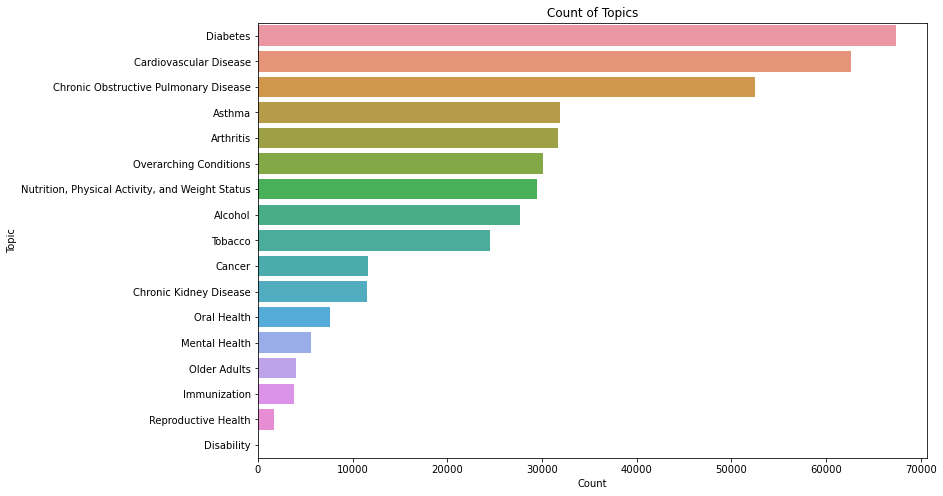

In [10]:
# Plot count of topics
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.values, y=topic_counts.index)
plt.title('Count of Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()


Cancer is the leading  chronic disease topic in the research while diability comes as the last topic on the research

In [11]:
# Create a pivot table to count occurrences of each topic in each state
topic_state_counts = data.pivot_table(index='Topic', columns='LocationDesc', aggfunc='size', fill_value=0)

# Print the DataFrame
topic_state_counts


LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,United States,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Topic,,,,,,,,,,,,,,,,,,,,,
Alcohol,517,517,517,517,517,517,517,515,517,517,...,517,160,517,517,390,517,517,517,517,517
Arthritis,582,582,582,582,582,582,582,582,582,582,...,582,224,582,582,582,582,582,582,582,582
Asthma,574,574,631,616,595,616,574,574,574,631,...,574,206,595,631,430,574,616,616,631,574
Cancer,216,216,216,216,216,216,216,216,216,216,...,216,86,216,216,167,216,216,216,216,216
Cardiovascular Disease,1152,1152,1236,1236,1194,1236,1152,1152,1152,1237,...,1152,316,1194,1236,531,1152,1236,1236,1236,1152
Chronic Kidney Disease,220,220,220,220,220,220,220,220,220,220,...,220,65,220,220,80,220,220,220,220,220
Chronic Obstructive Pulmonary Disease,922,922,1090,1006,1006,1006,922,922,922,1090,...,922,360,1006,1048,640,922,1006,1006,1090,922
Diabetes,1216,1216,1300,1300,1258,1300,1216,1216,1216,1300,...,1216,421,1258,1300,963,1216,1300,1300,1300,1216
Disability,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
print(topic_state_counts.shape)


(17, 55)


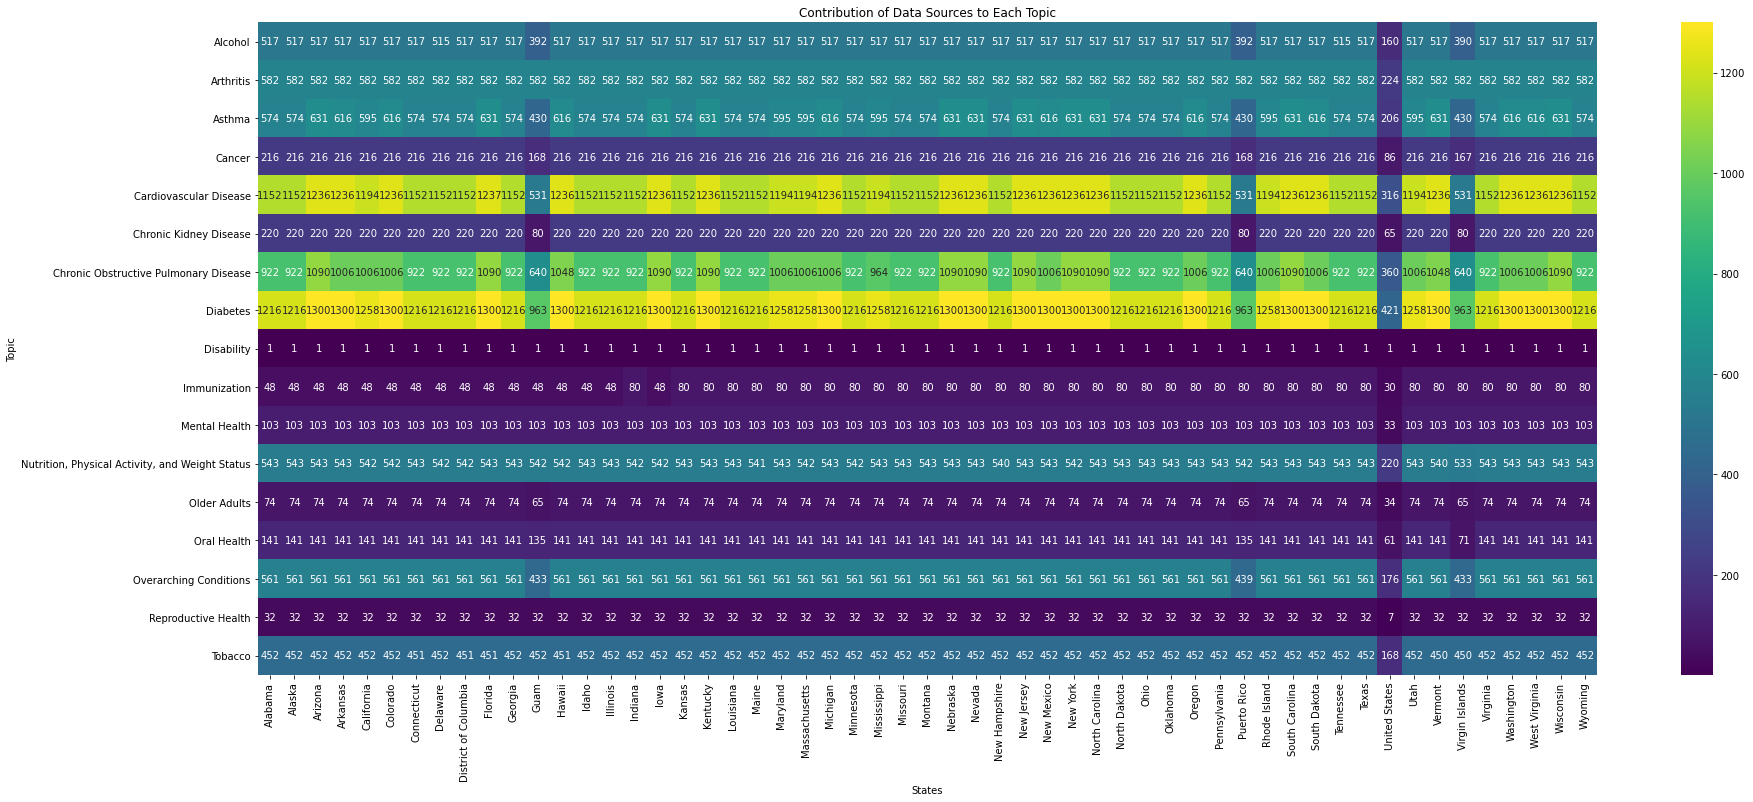

In [13]:
# Increase heatmap size and font size for better visualization
plt.figure(figsize=(30, 12))
sns.heatmap(topic_state_counts, cmap='viridis', annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Contribution of Data Sources to Each Topic')
plt.xlabel('States')
plt.ylabel('Topic')
plt.xticks(rotation=90)
plt.show()


#### Checking the leading states with the highest count for each topic

In [14]:
# Group data by Topic and LocationDesc and count occurrences
topic_state = data.groupby(['Topic', 'LocationDesc']).size()

# Find the states with the highest count for each topic
max_state_per_topic = topic_state.groupby('Topic').idxmax()

# Create a table or print out the results
result_table = pd.DataFrame(max_state_per_topic, columns=['LocationDesc'])
result_table.reset_index(inplace=True)
result_table


,Topic,LocationDesc
0,Alcohol,"(Alcohol, Alabama)"
1,Arthritis,"(Arthritis, Alabama)"
2,Asthma,"(Asthma, Arizona)"
3,Cancer,"(Cancer, Alabama)"
4,Cardiovascular Disease,"(Cardiovascular Disease, Florida)"
5,Chronic Kidney Disease,"(Chronic Kidney Disease, Alabama)"
6,Chronic Obstructive Pulmonary Disease,"(Chronic Obstructive Pulmonary Disease, Arizona)"
7,Diabetes,"(Diabetes, Arizona)"
8,Disability,"(Disability, Alabama)"
9,Immunization,"(Immunization, Indiana)"


#### Plotting Topics to see their distribution among States

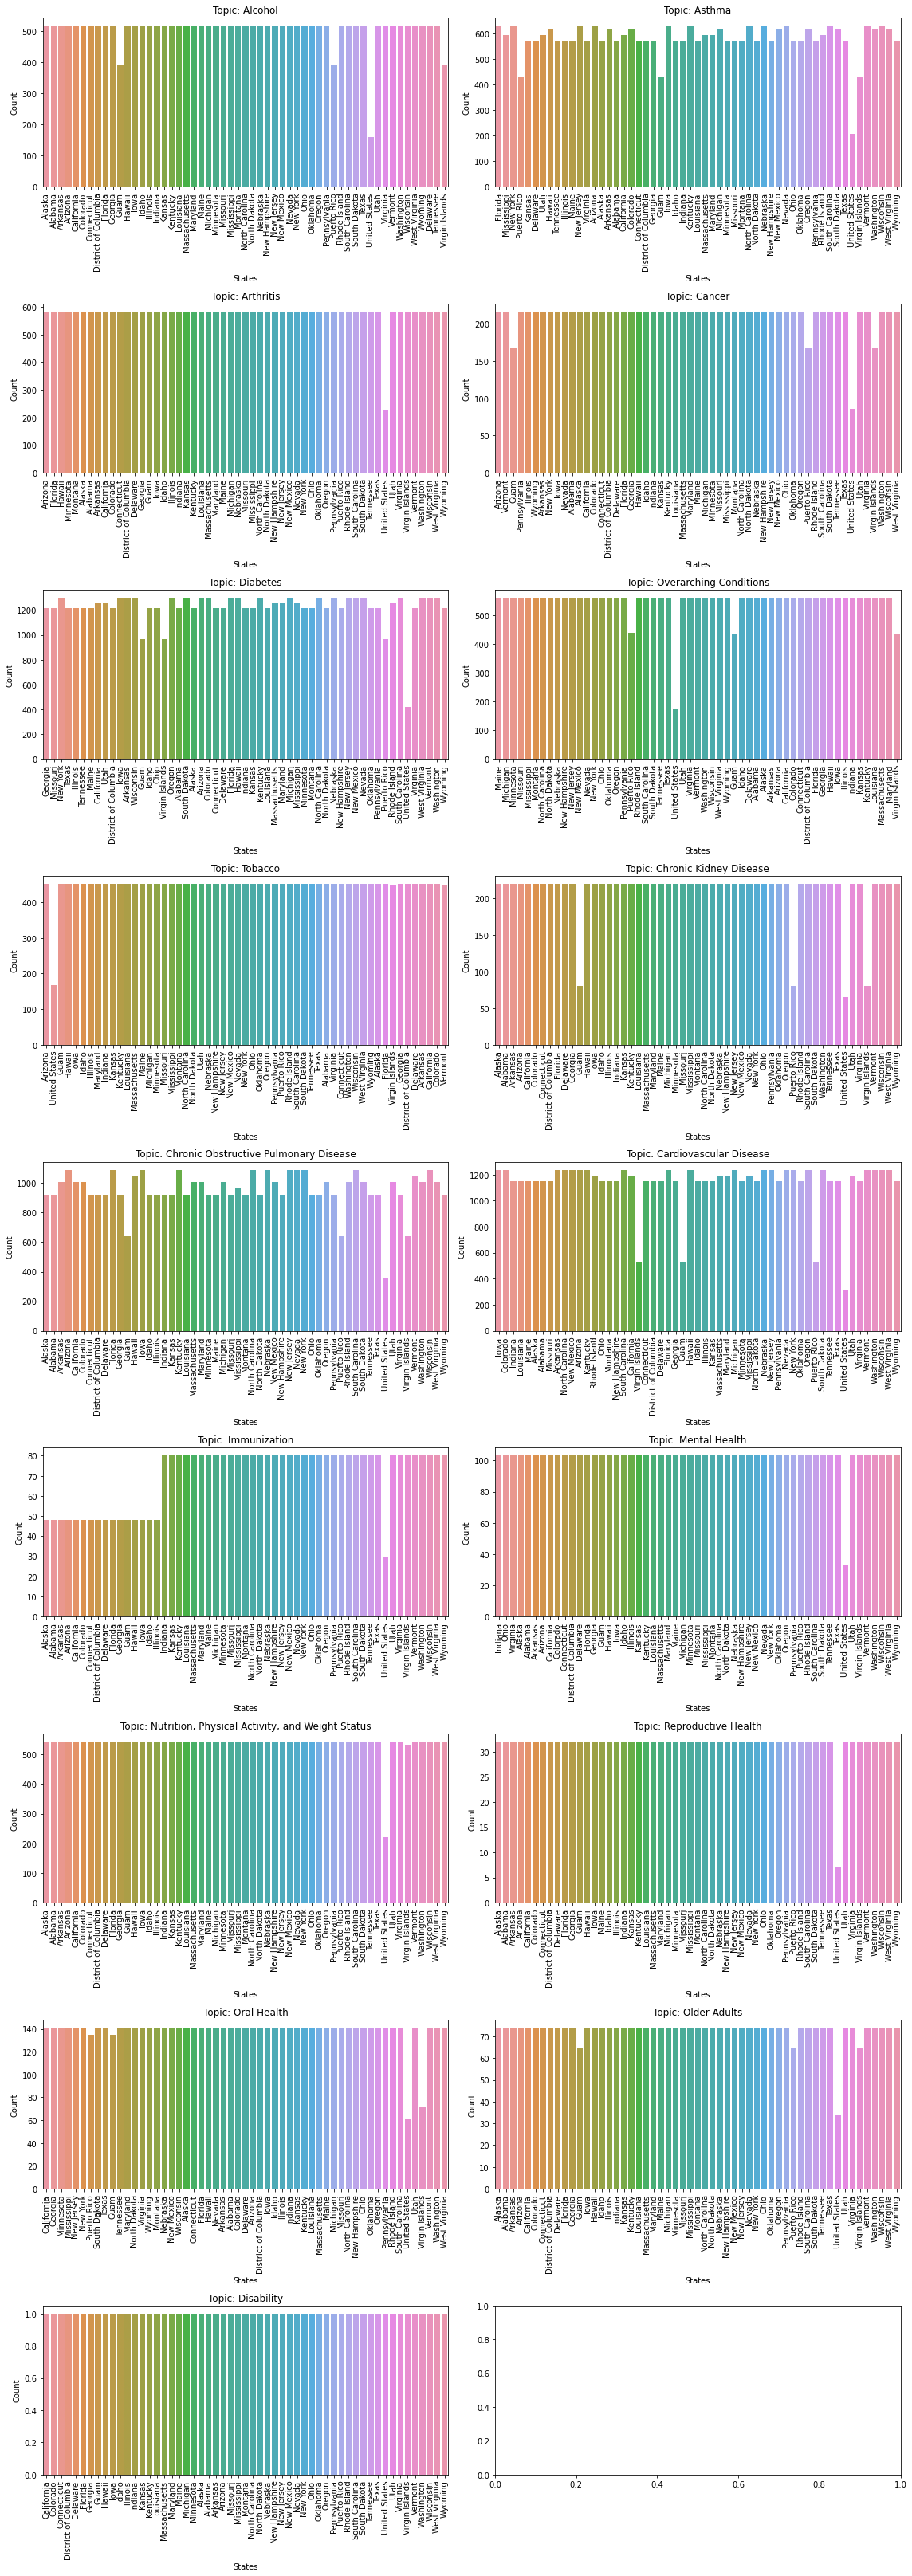

In [15]:
# Get unique topics
topics = data['Topic'].unique()

# Calculate the number of rows and columns for subplots
num_rows = len(topics) // 2 + (len(topics) % 2)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))

# Flatten the axes if necessary
if num_rows > 1:
    axes = axes.flatten()

# Iterate over each topic and plot
for i, topic in enumerate(topics):
    ax = axes[i]
    sns.countplot(x='LocationDesc', data=data[data['Topic'] == topic], ax=ax)
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('States')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


### States

In [16]:
# Count occurrences of each state (LocationDesc)
state_counts = data['LocationDesc'].value_counts()
print(state_counts)



Nebraska                7779
Kentucky                7779
Wisconsin               7779
Nevada                  7779
New Jersey              7779
North Carolina          7779
South Carolina          7779
New York                7778
Arizona                 7747
Florida                 7747
Iowa                    7746
Vermont                 7732
Hawaii                  7688
Michigan                7680
South Dakota            7680
Oregon                  7680
West Virginia           7680
Washington              7680
New Mexico              7680
Arkansas                7648
Colorado                7647
Maryland                7575
Rhode Island            7575
Utah                    7575
Massachusetts           7574
California              7542
Mississippi             7533
Kansas                  7386
Missouri                7386
Oklahoma                7386
Montana                 7386
Louisiana               7386
Wyoming                 7386
Pennsylvania            7386
Texas         

#### Occurrences of diseases (Topic) in each  States

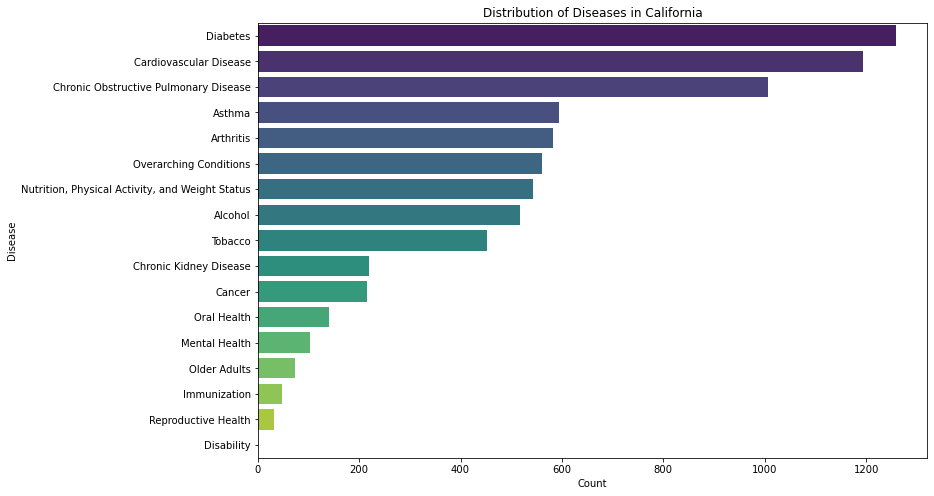

In [17]:
# Filter data for entries where LocationDesc is California
california_data = data[data['LocationDesc'] == 'California']

# Count occurrences of each disease (Topic) in California
disease_counts_california = california_data['Topic'].value_counts()

# Plot disease distribution in California
plt.figure(figsize=(12, 8))
sns.barplot(x=disease_counts_california.values, y=disease_counts_california.index, palette='viridis')
plt.title('Distribution of Diseases in California')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()


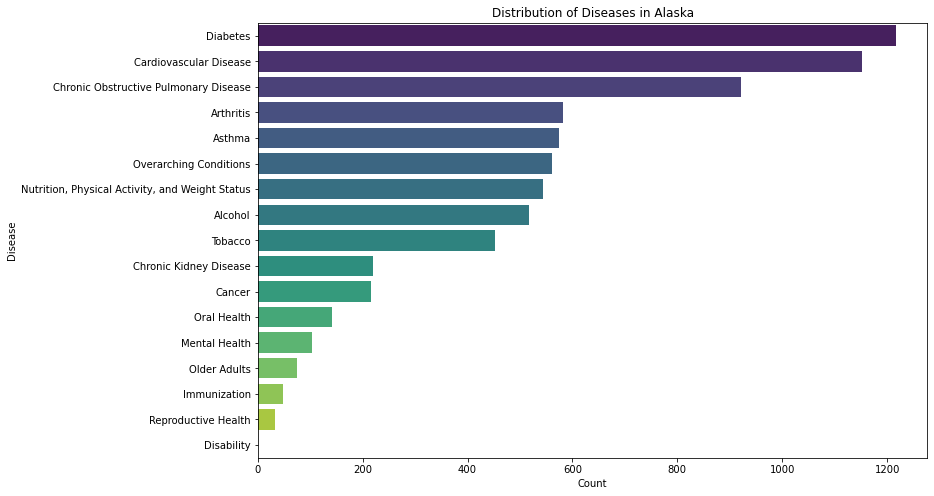

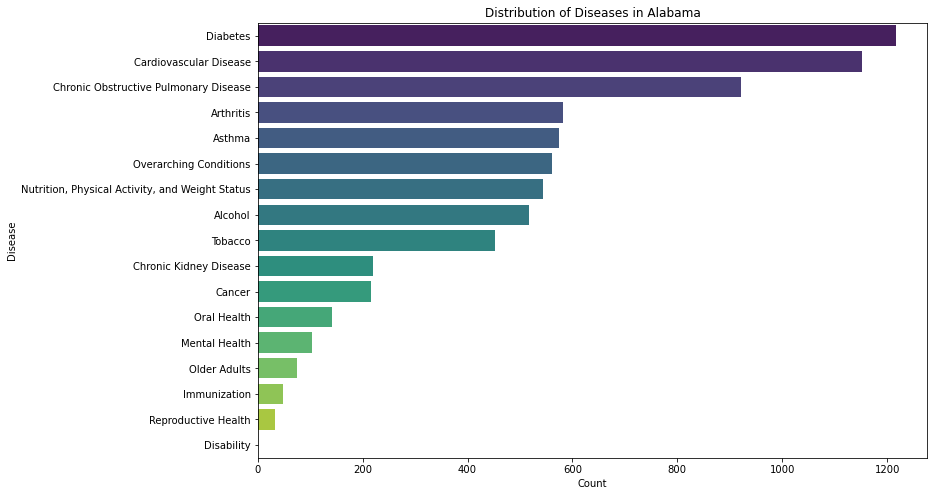

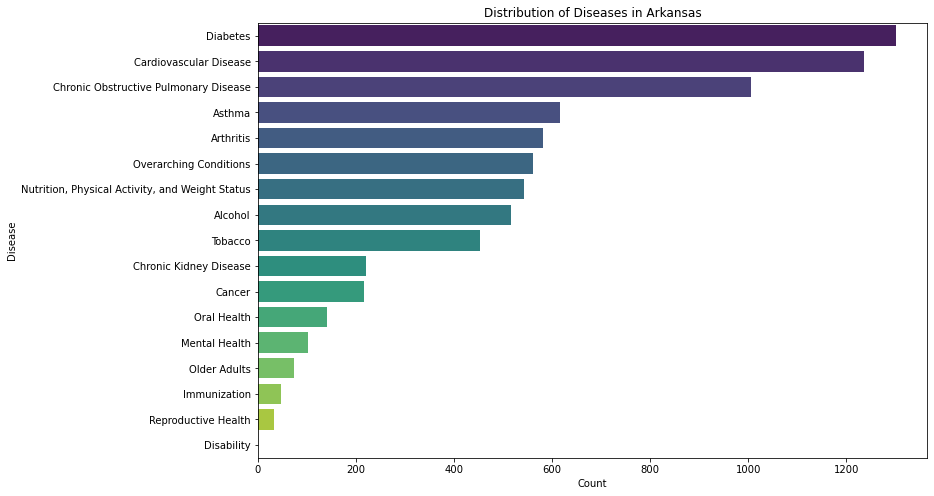

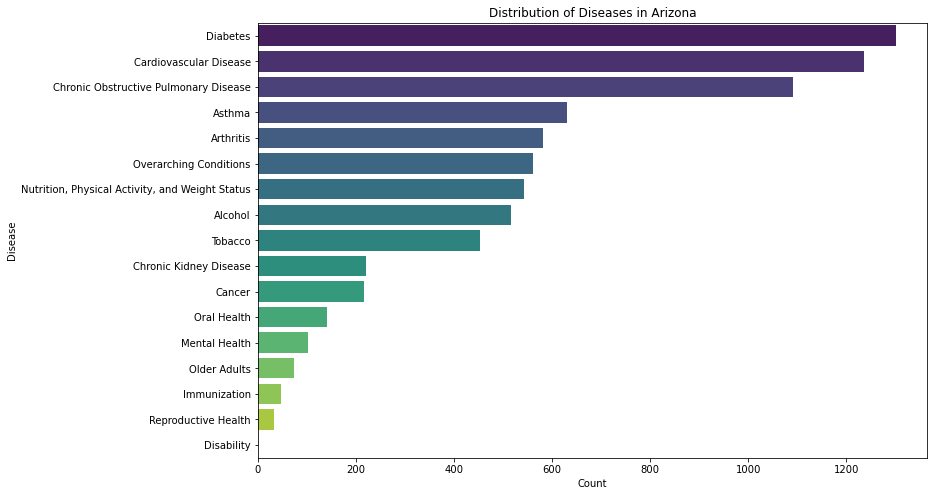

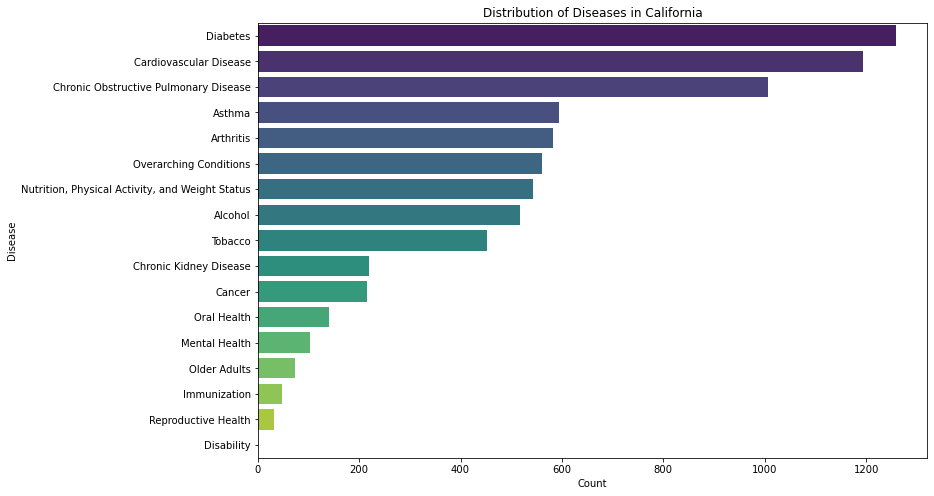

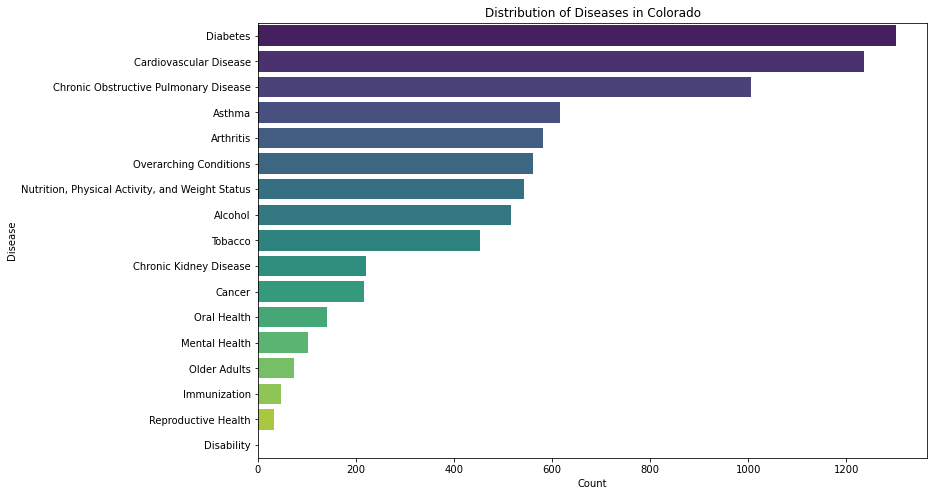

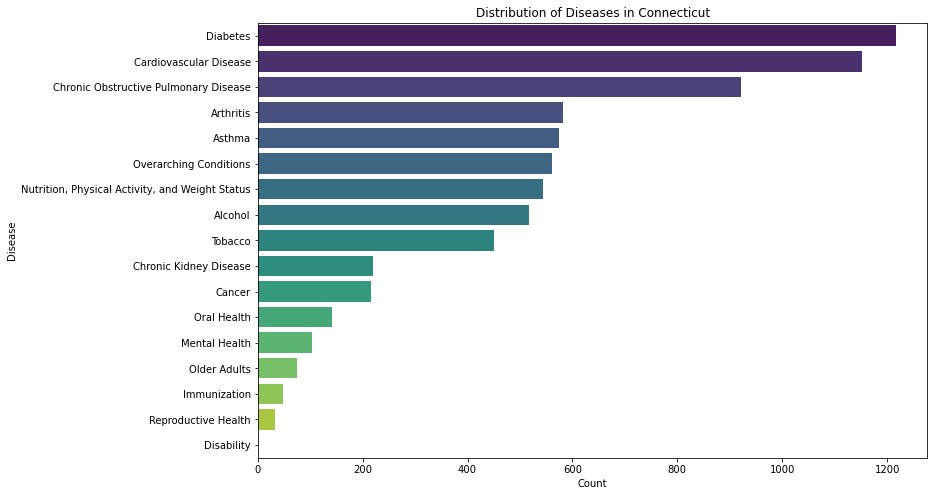

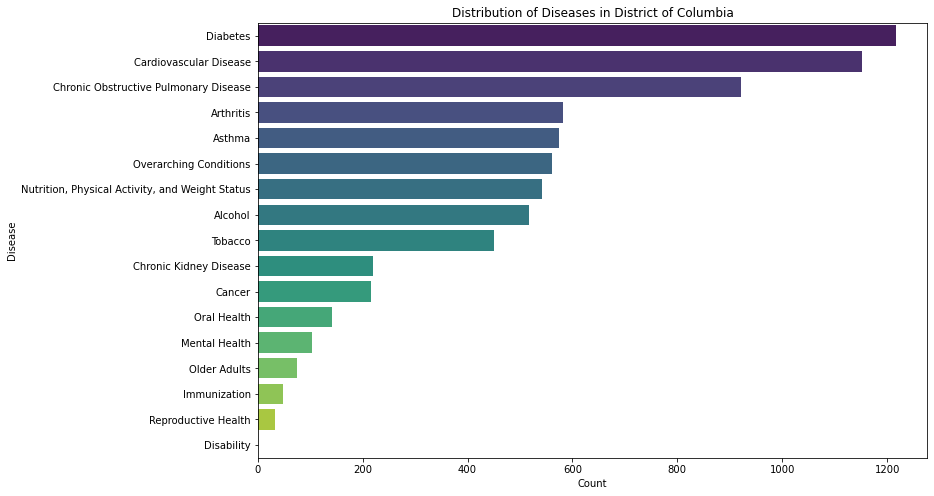

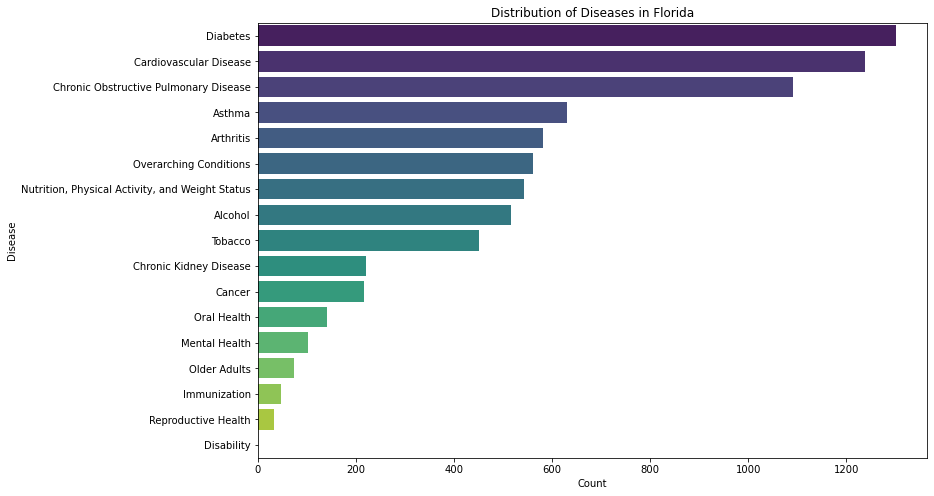

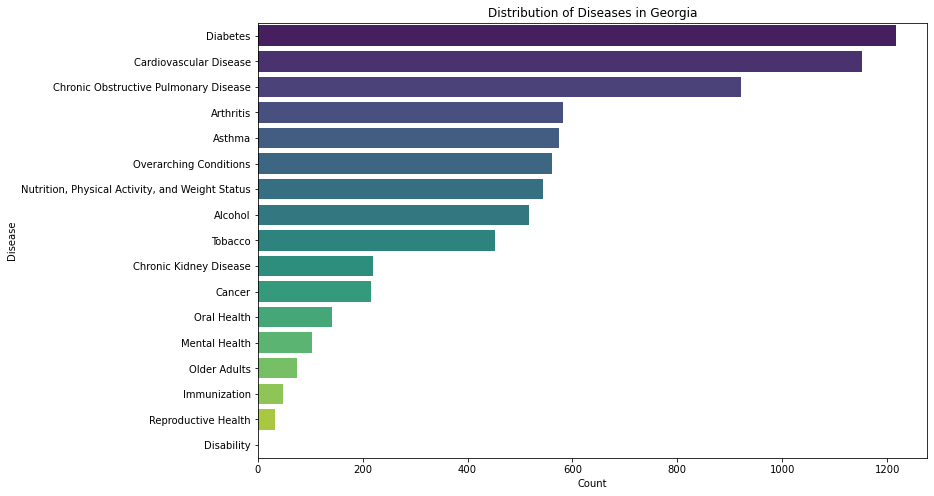

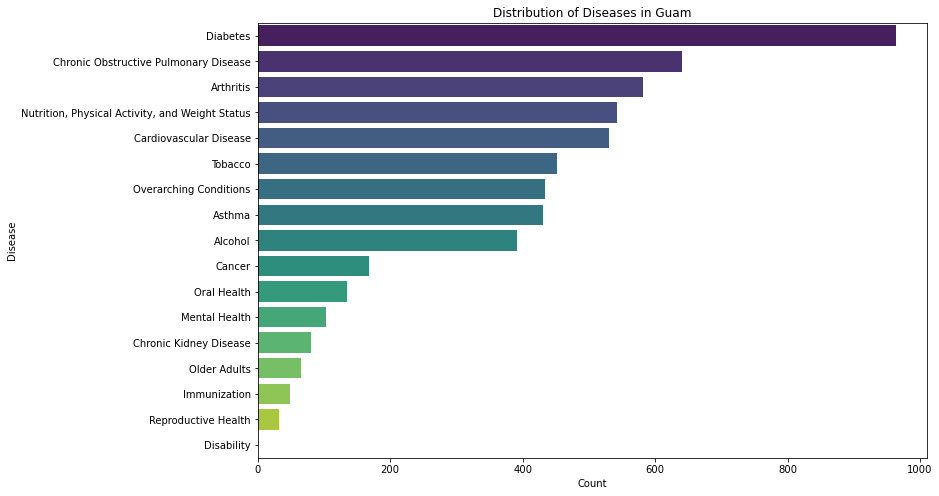

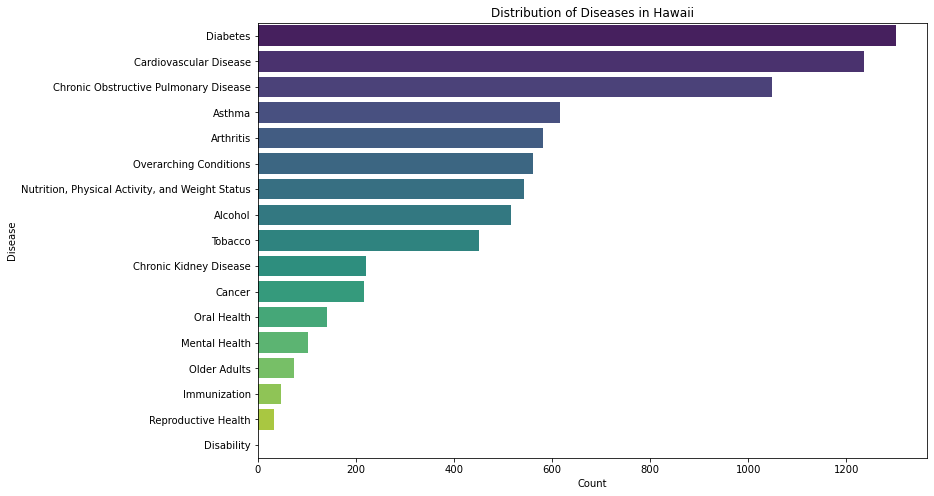

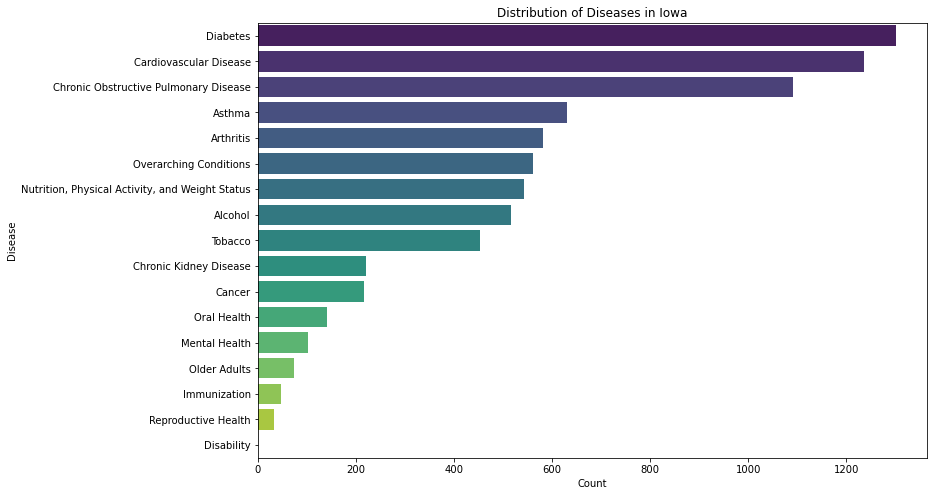

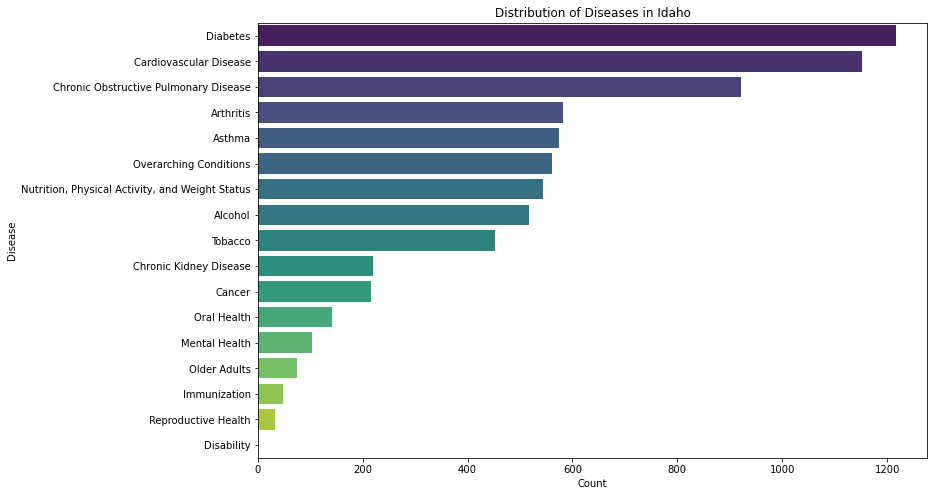

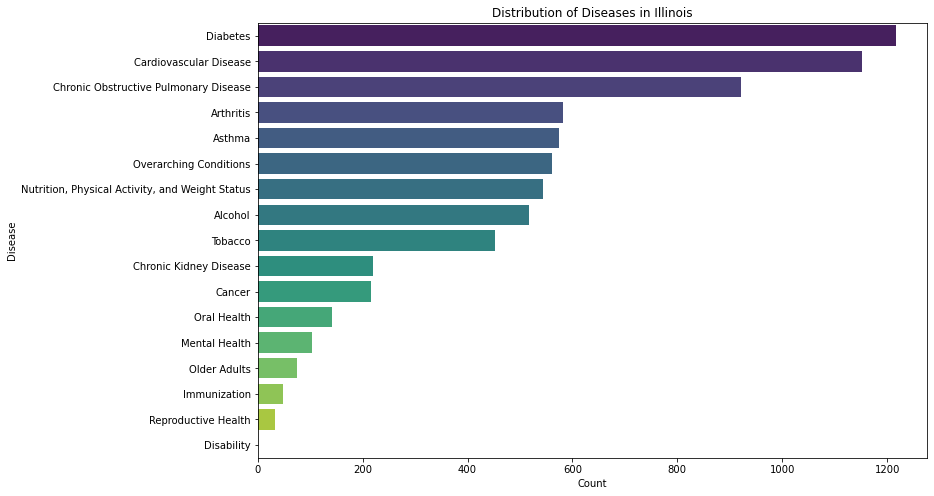

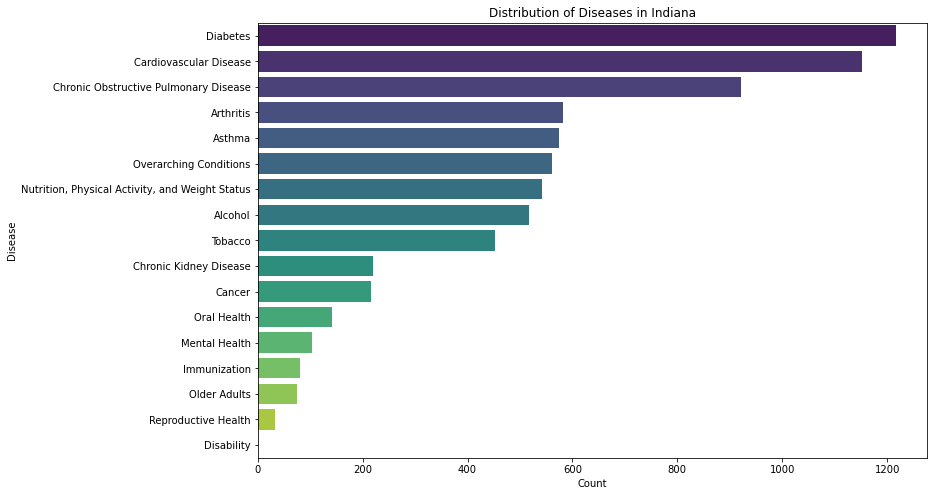

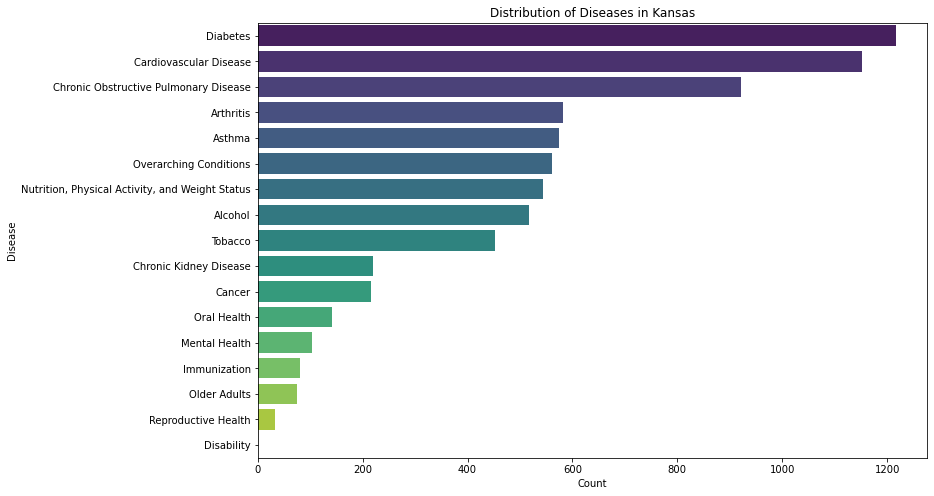

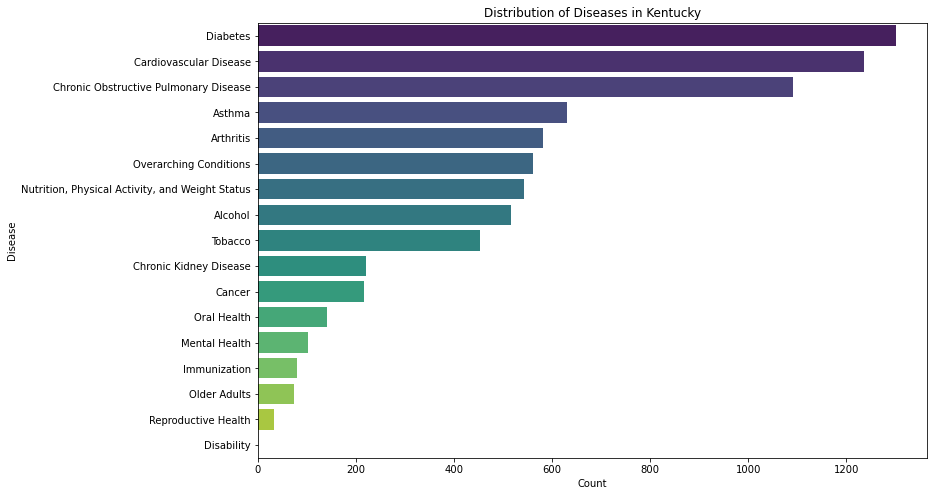

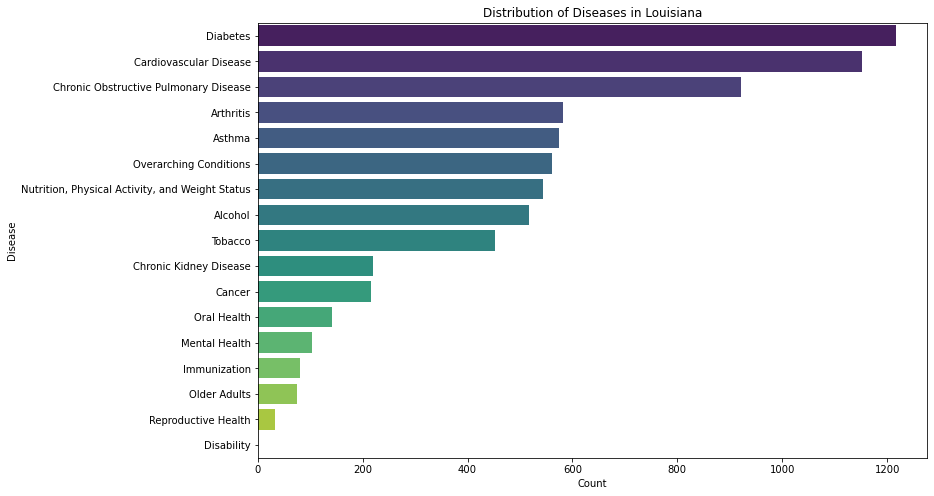

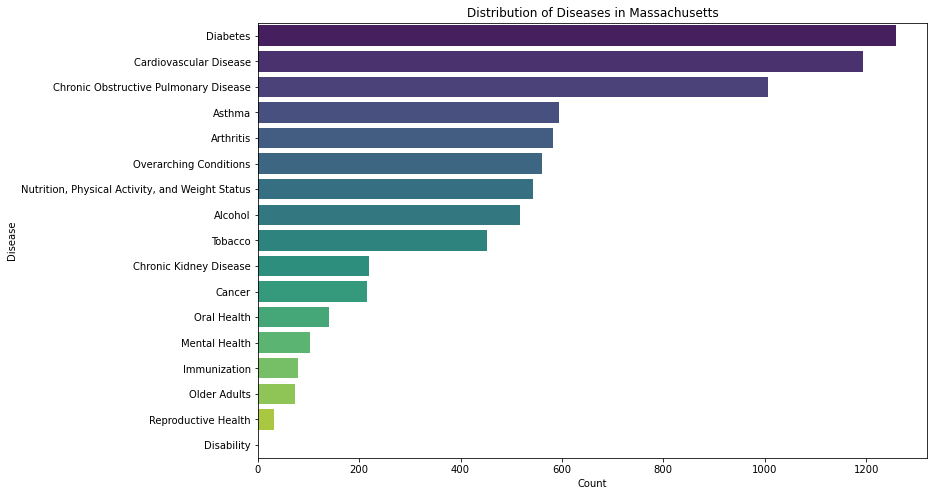

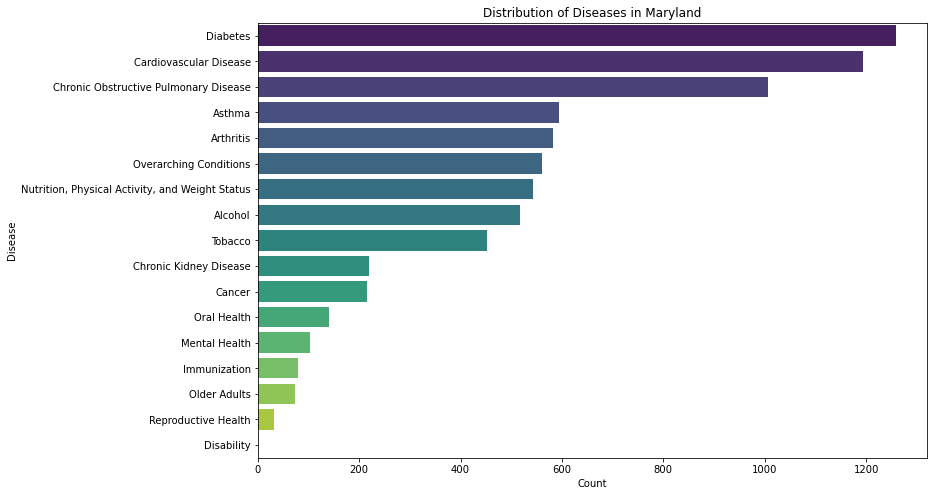

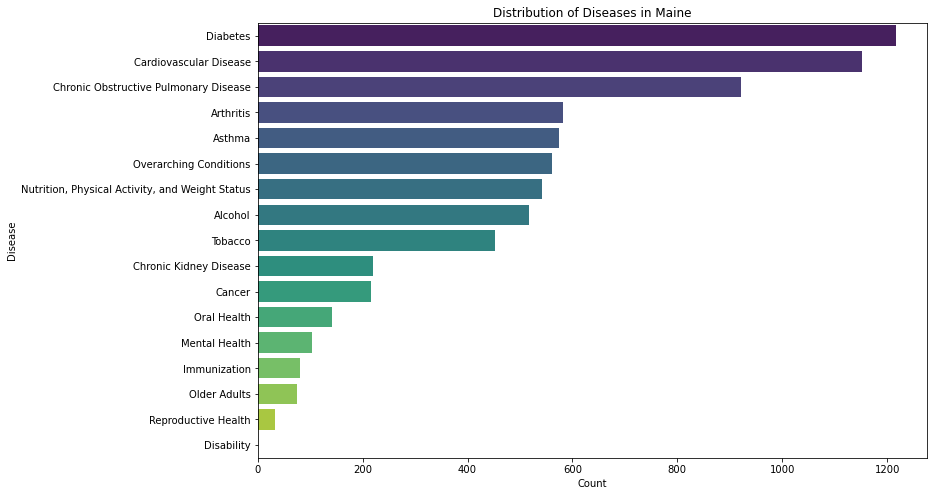

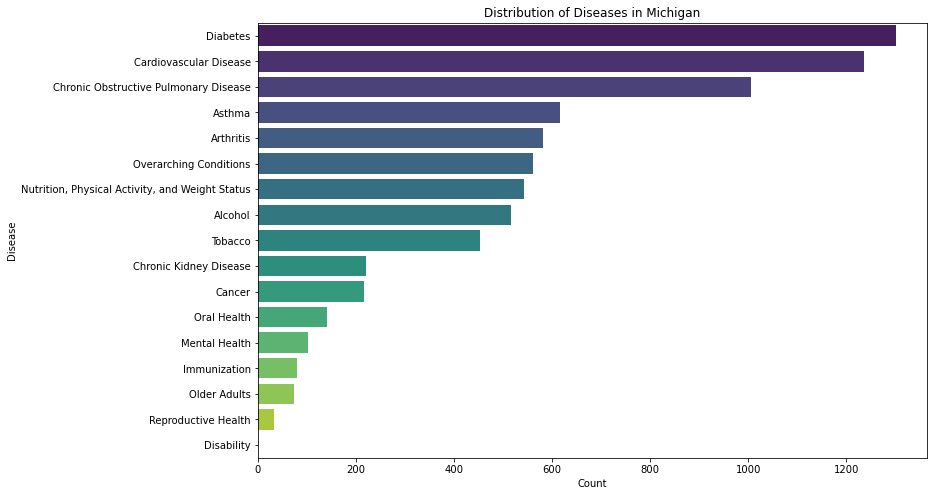

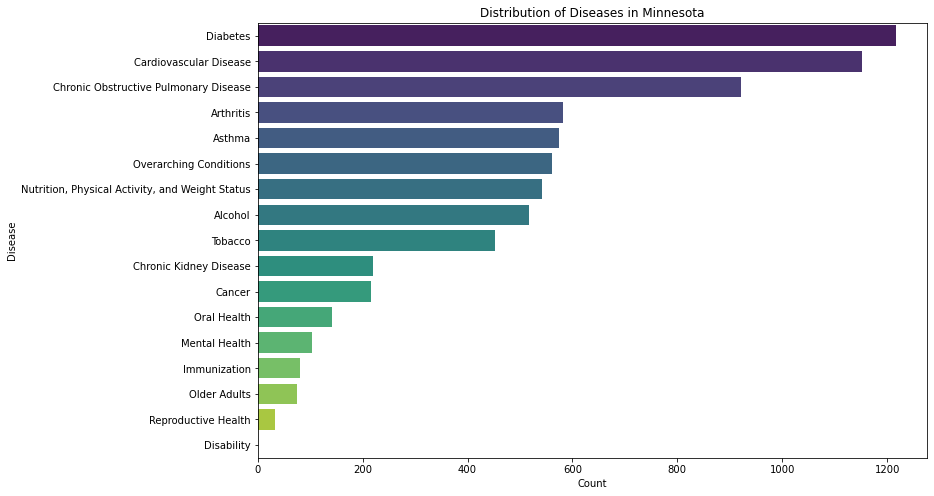

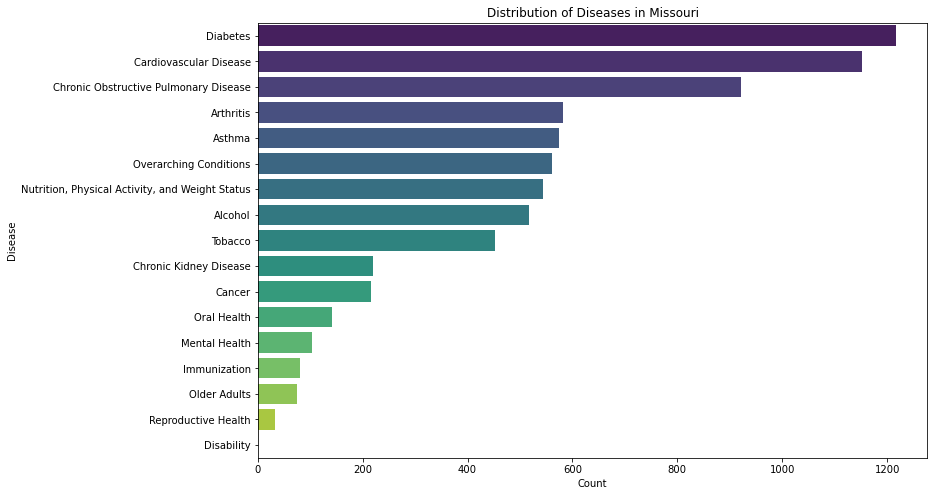

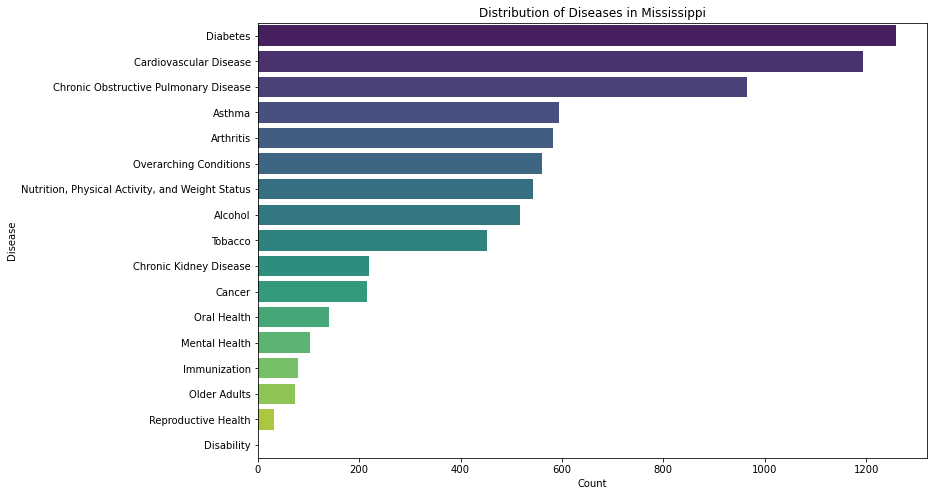

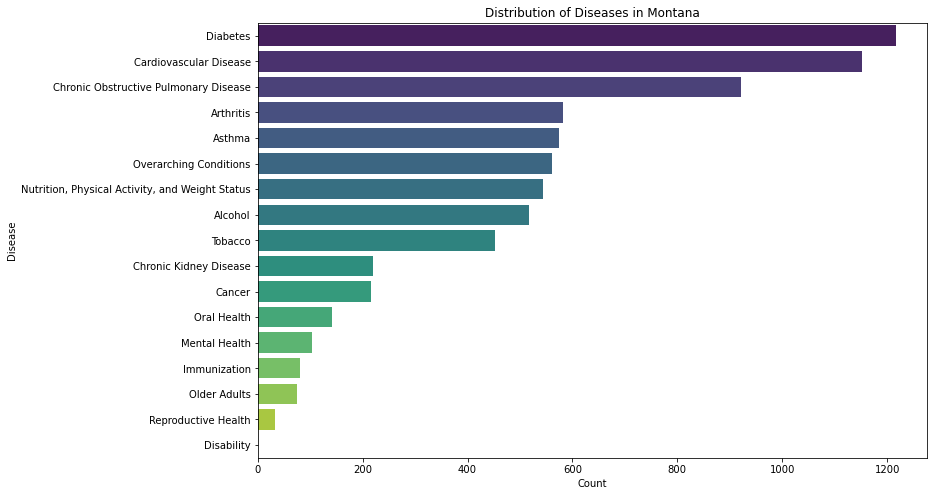

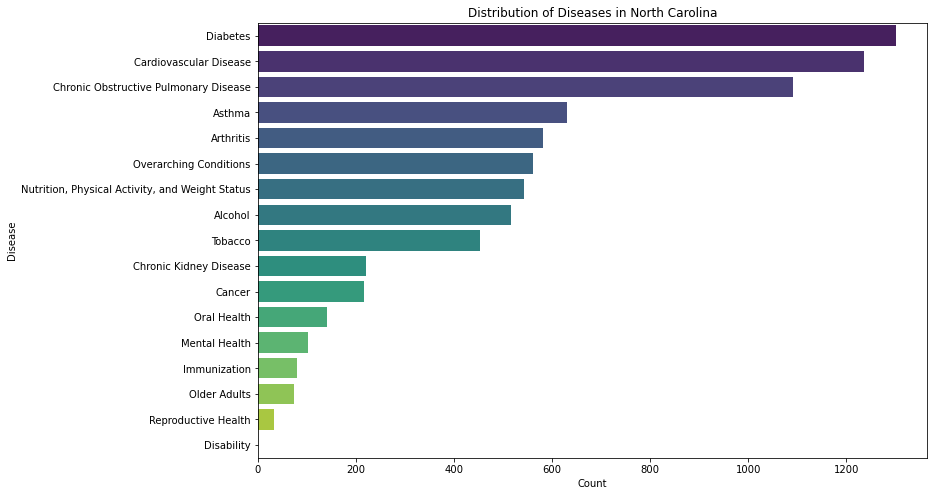

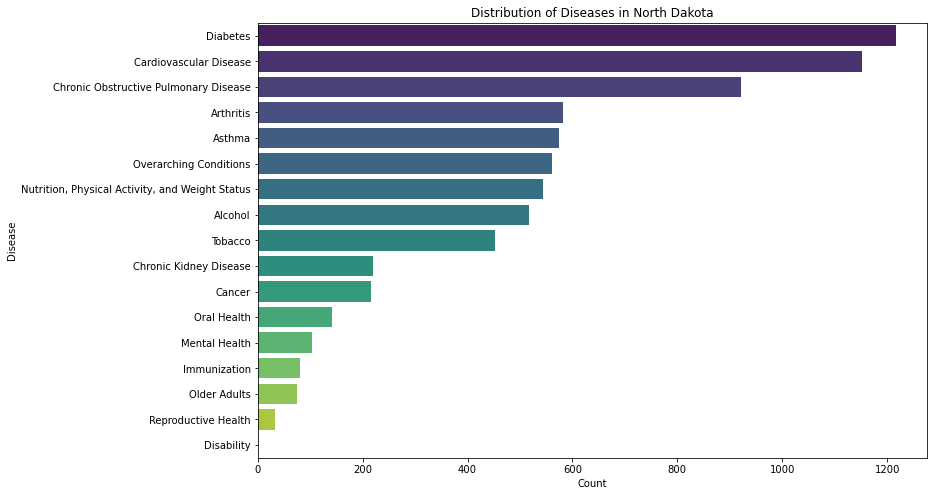

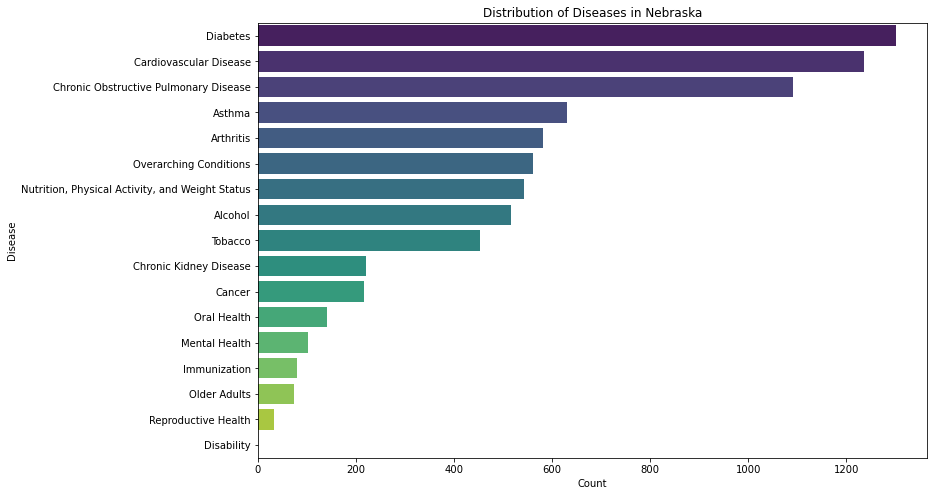

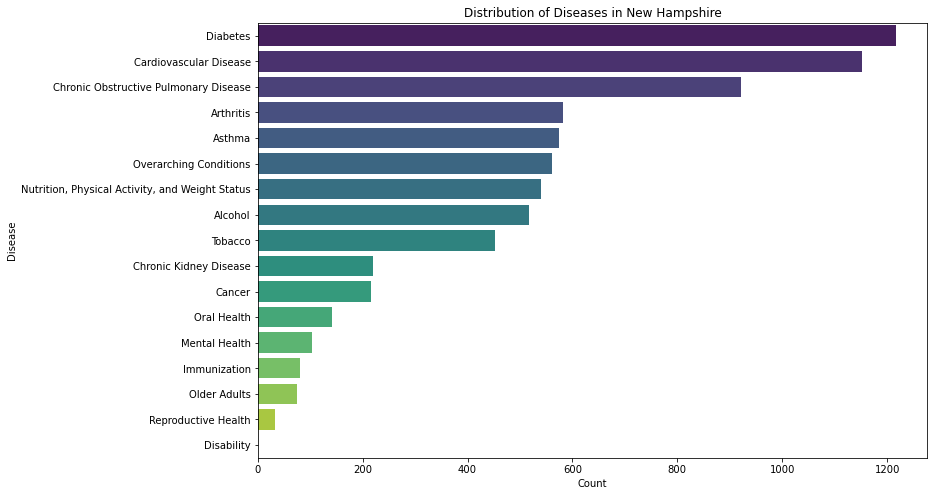

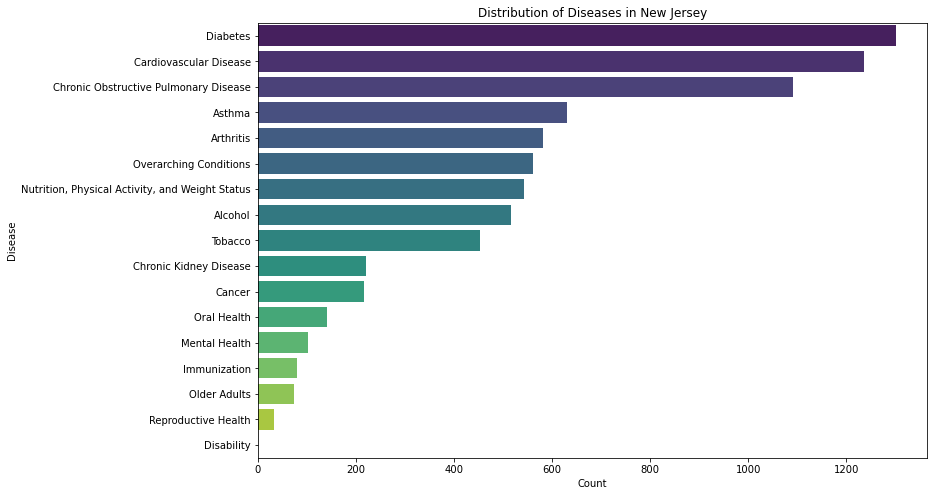

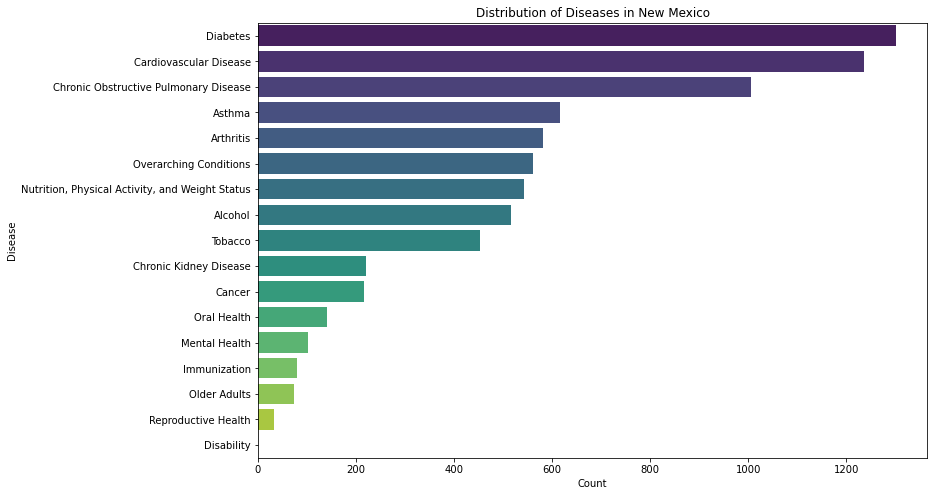

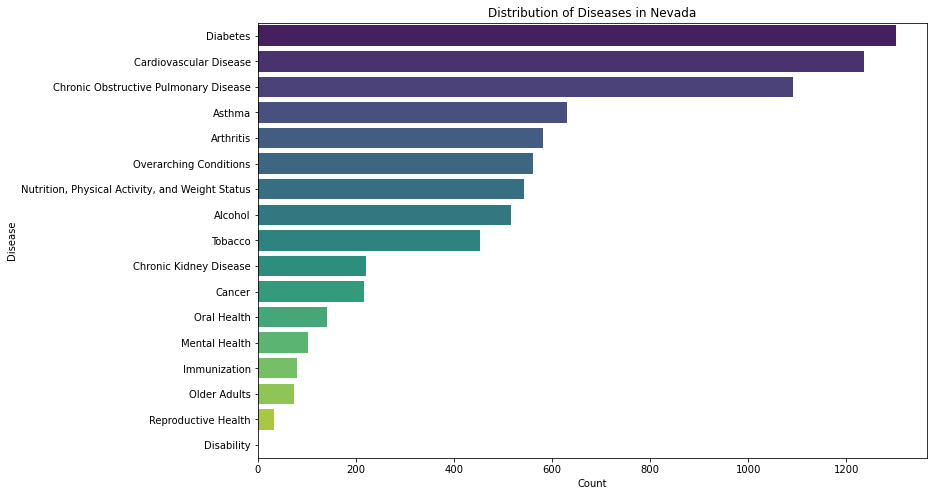

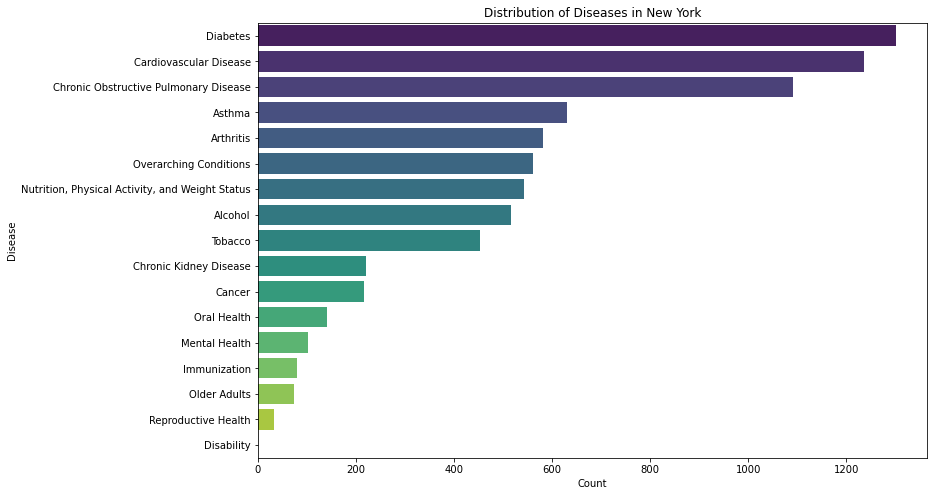

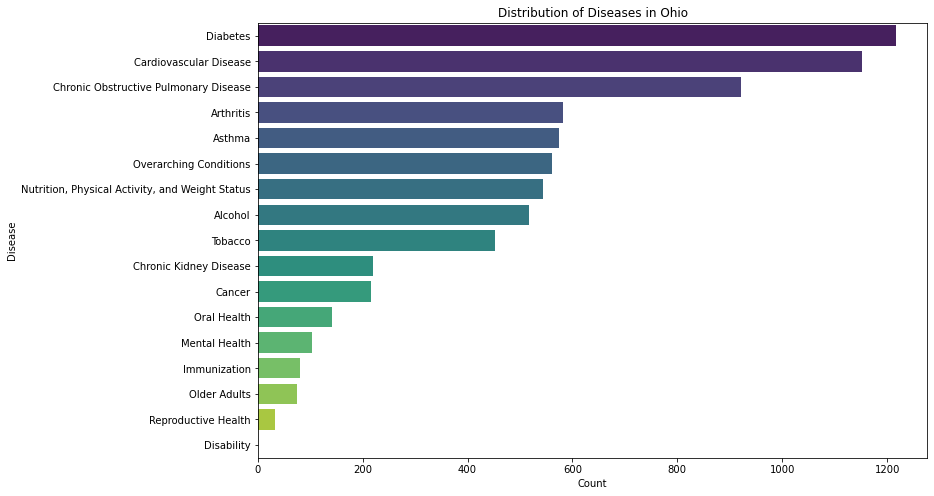

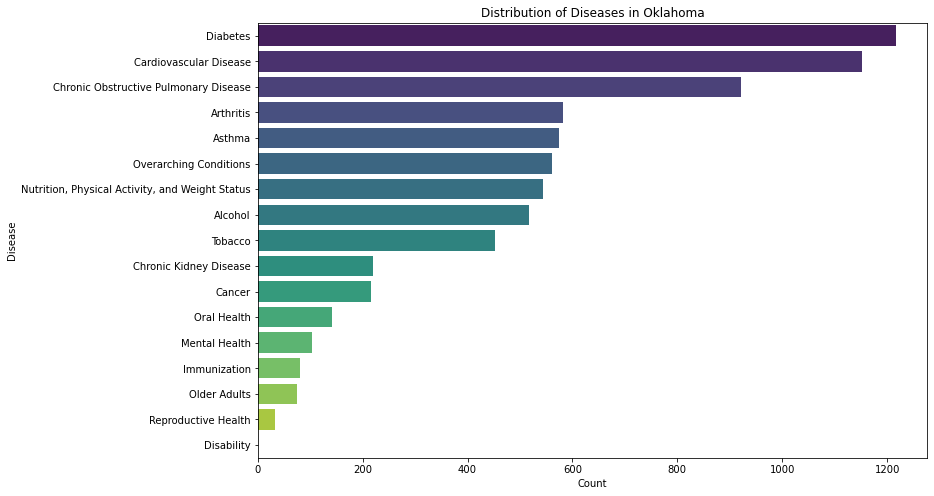

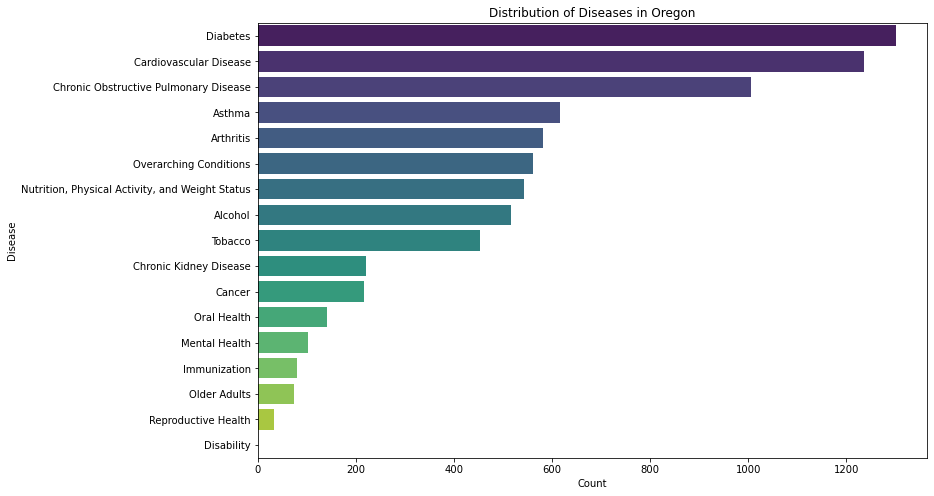

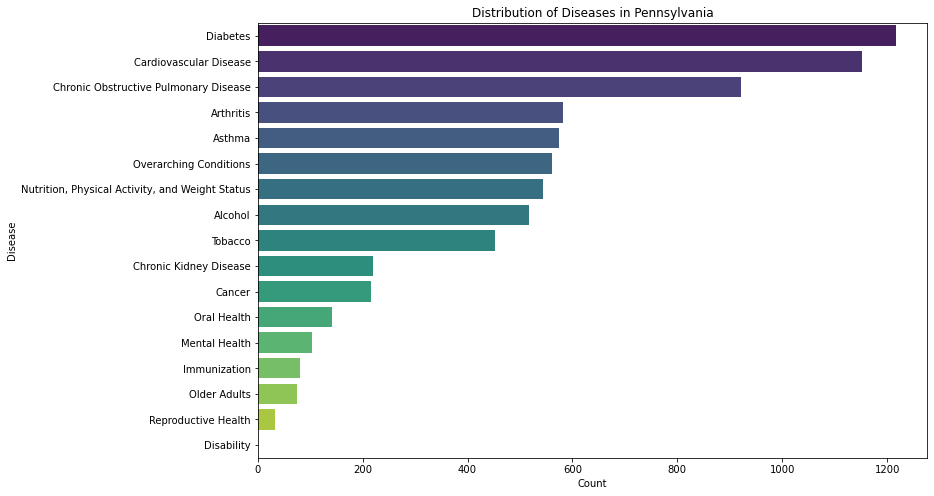

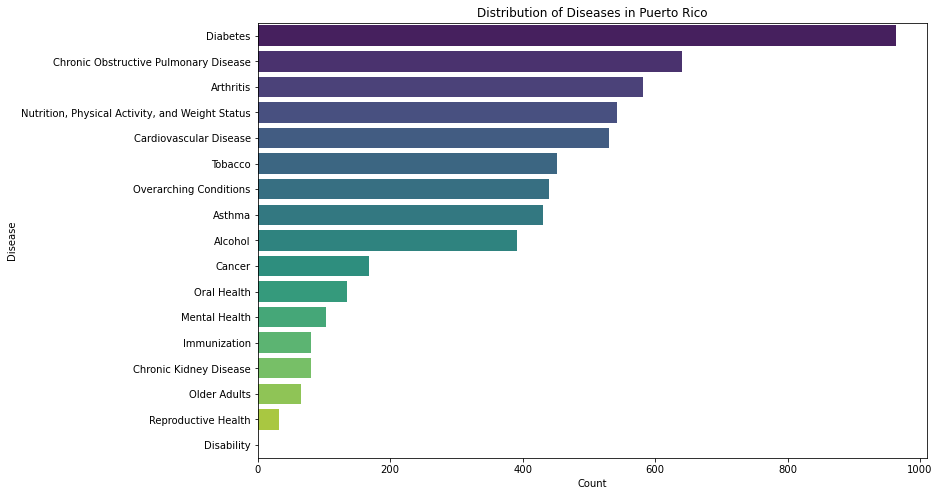

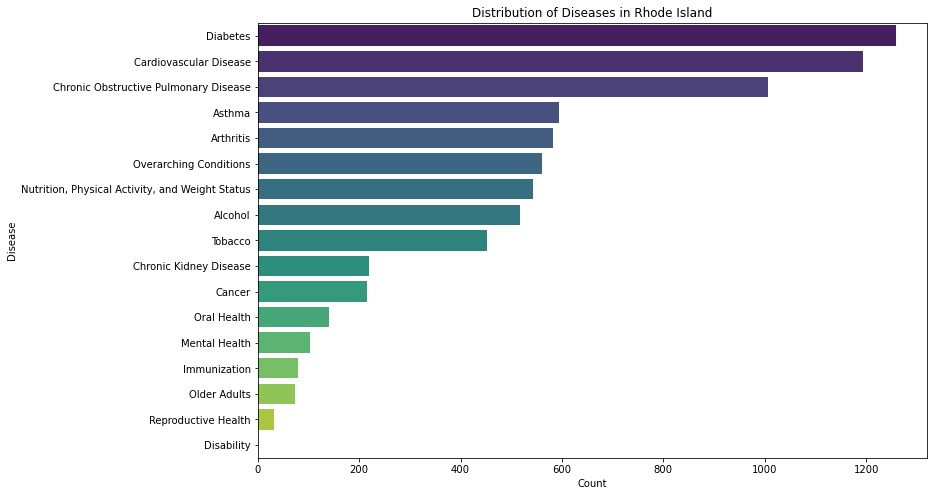

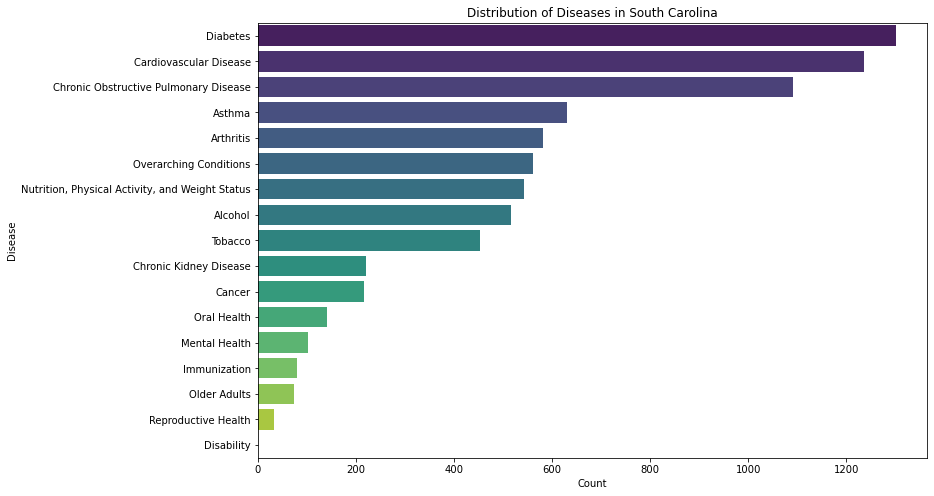

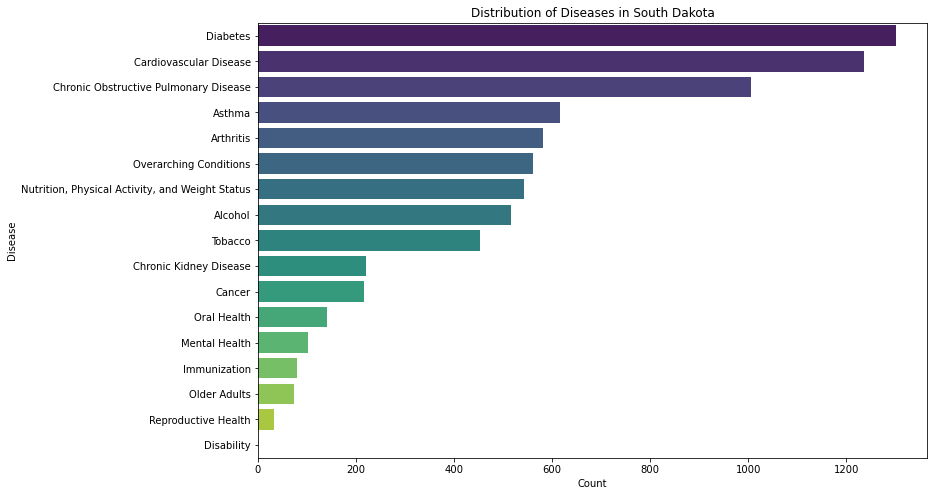

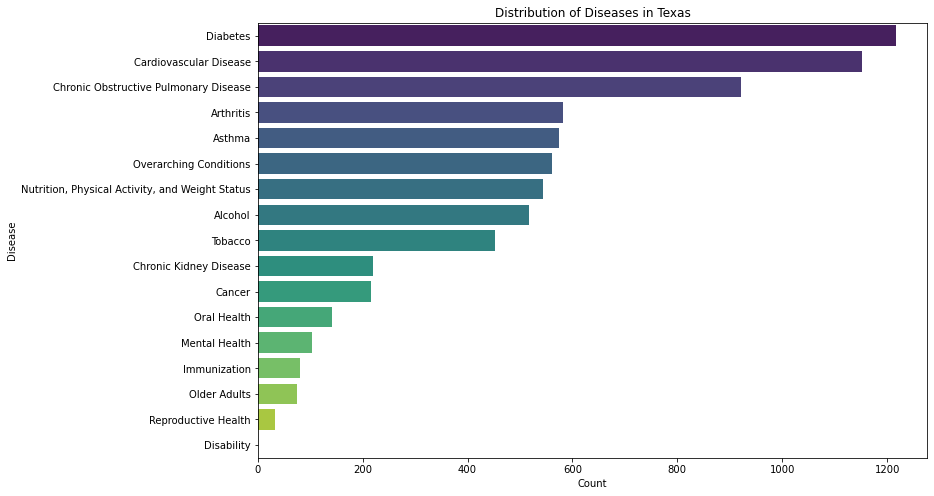

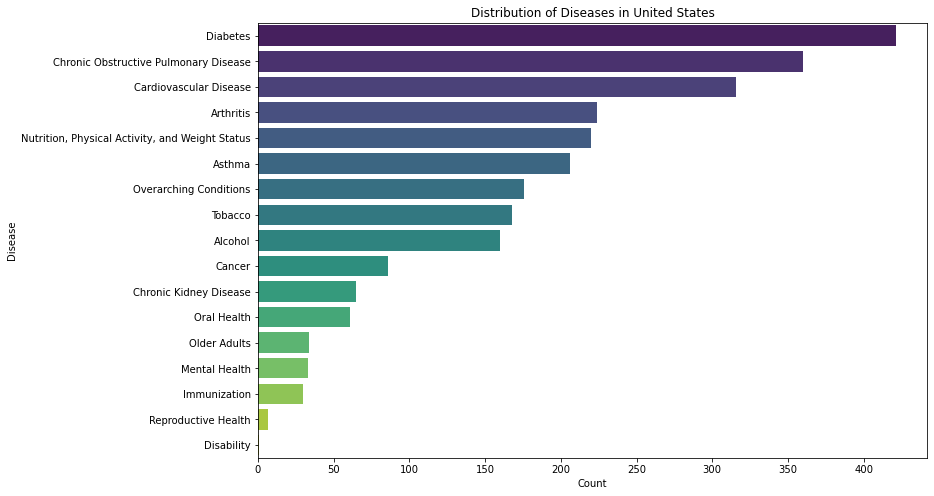

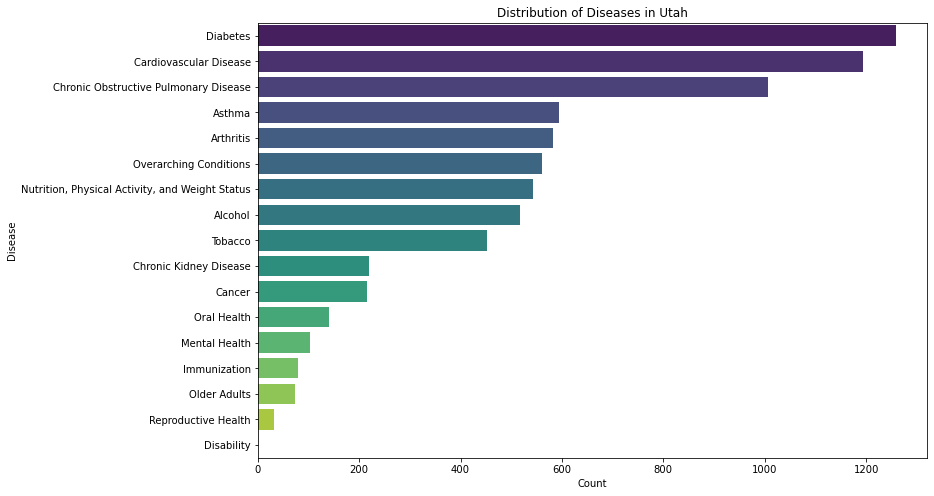

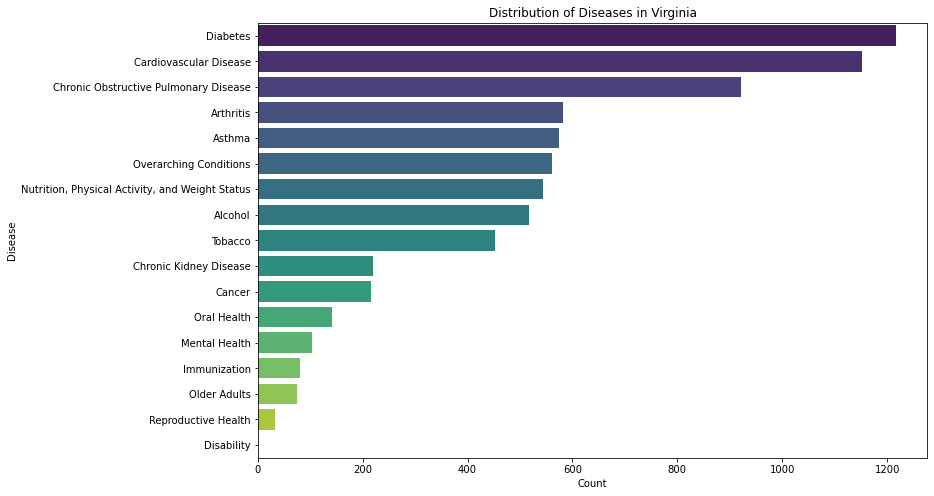

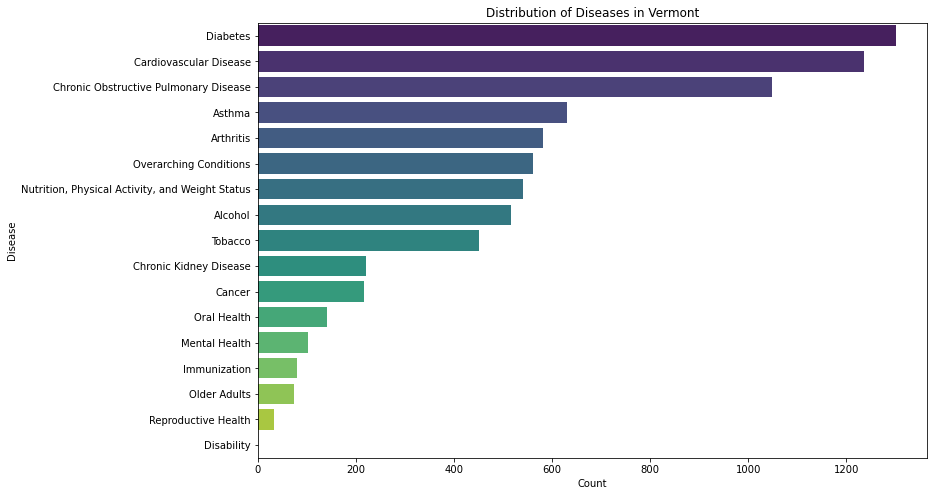

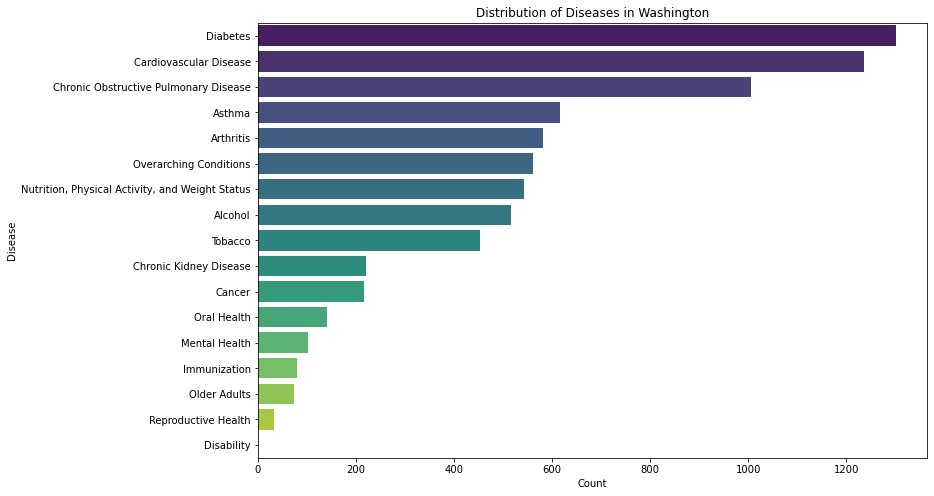

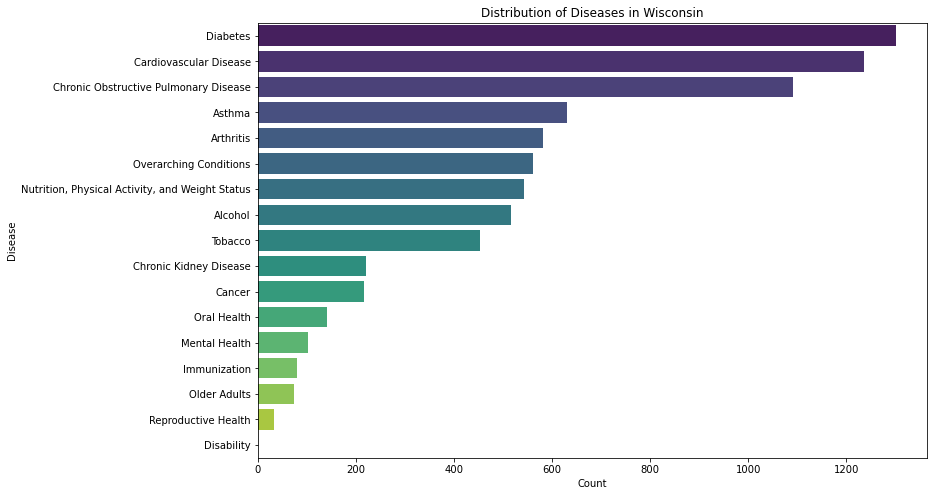

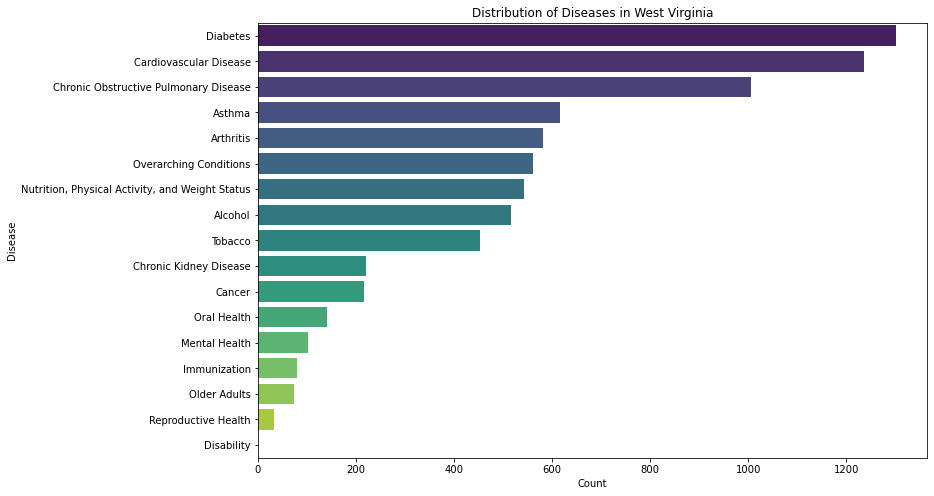

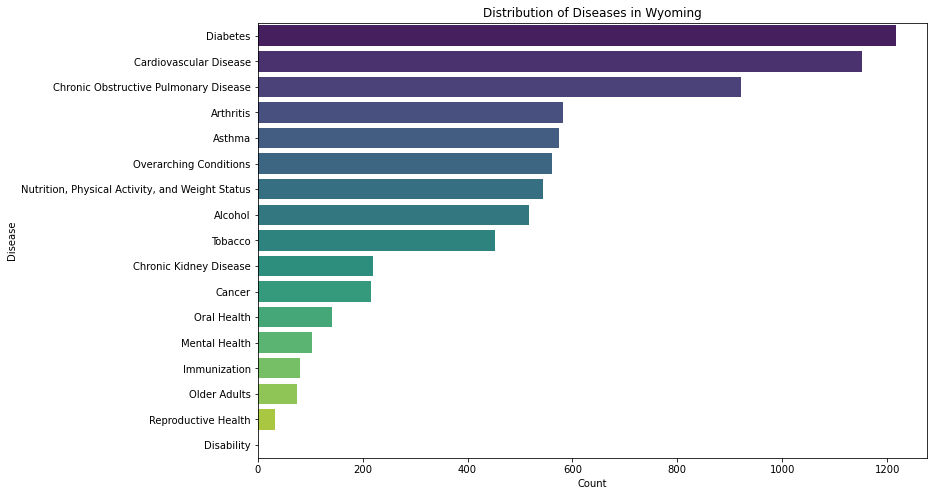

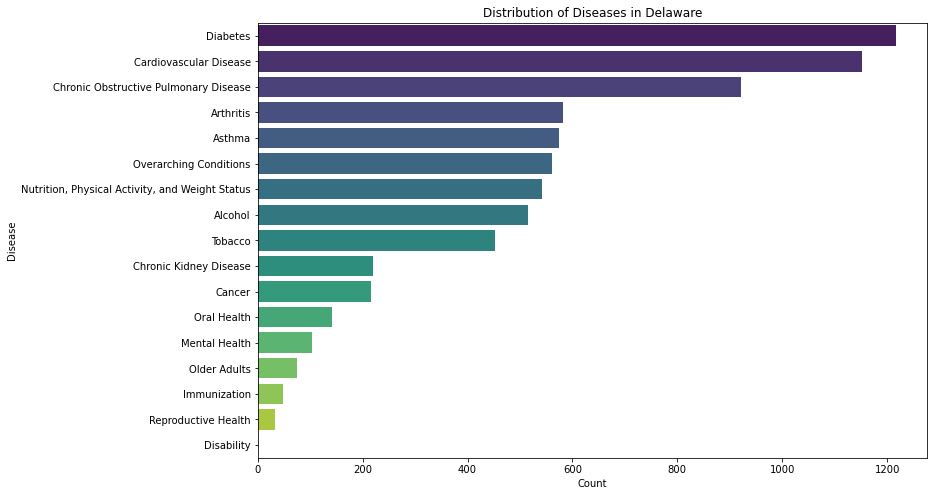

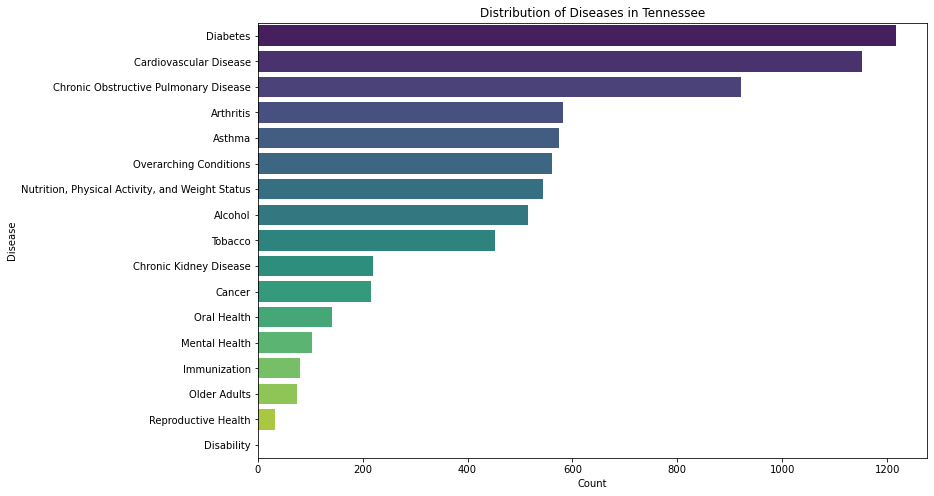

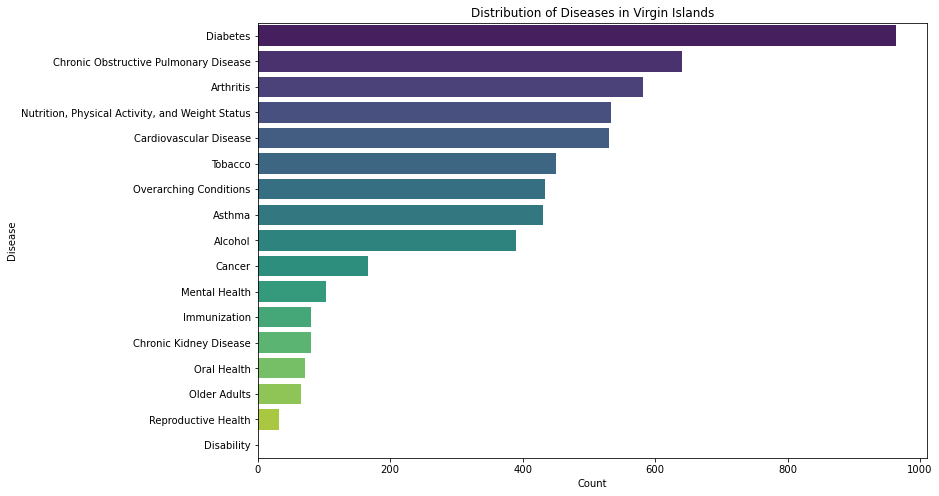

In [18]:

# Get unique states
states = data['LocationDesc'].unique()

# Plot disease distribution for each state
for state in states:
    # Filter data for the current state
    state_data = data[data['LocationDesc'] == state]
    
    # Count occurrences of each disease (Topic) in the current state
    disease_counts_state = state_data['Topic'].value_counts()
    
    # Plot disease distribution for the current state
    plt.figure(figsize=(12, 8))
    sns.barplot(x=disease_counts_state.values, y=disease_counts_state.index, palette='viridis')
    plt.title(f'Distribution of Diseases in {state}')
    plt.xlabel('Count')
    plt.ylabel('Disease')
    plt.show()


### Study period
Lets take a look at te study period of each topic as provided by YearStart and YearEnd

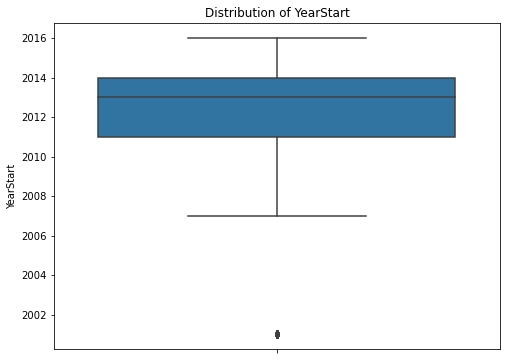

In [19]:
# Boxplot of 'YearStart'
plt.figure(figsize=(8, 6))
sns.boxplot(y='YearStart', data=data)
plt.title('Distribution of YearStart')
plt.show()

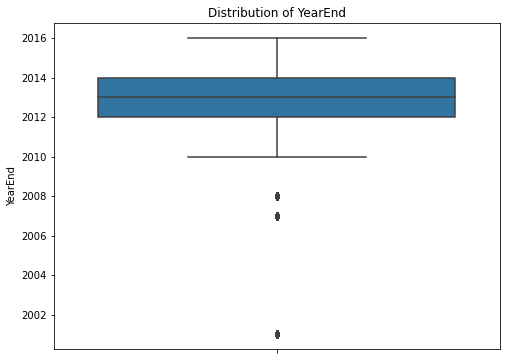

In [20]:
# Boxplot of 'YearEnd'
plt.figure(figsize=(8, 6))
sns.boxplot(y='YearEnd', data=data)
plt.title('Distribution of YearEnd')
plt.show()

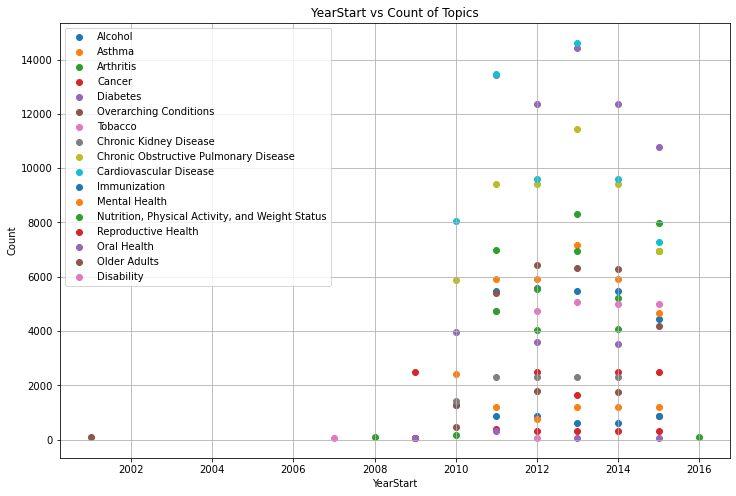

In [21]:
# Count occurrences of each topic by YearStart
unique_topics = data['Topic'].unique()
topic_year_counts = data.groupby(['Topic', 'YearStart']).size().reset_index(name='Count')

# Create a scatter plot for each topic
plt.figure(figsize=(12, 8))
for topic in unique_topics:
    topic_data = topic_year_counts[topic_year_counts['Topic'] == topic]
    plt.scatter(topic_data['YearStart'], topic_data['Count'], label=topic)

plt.title('YearStart vs Count of Topics')
plt.xlabel('YearStart')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


Overaching Conditions had the earliest YearStart in the study

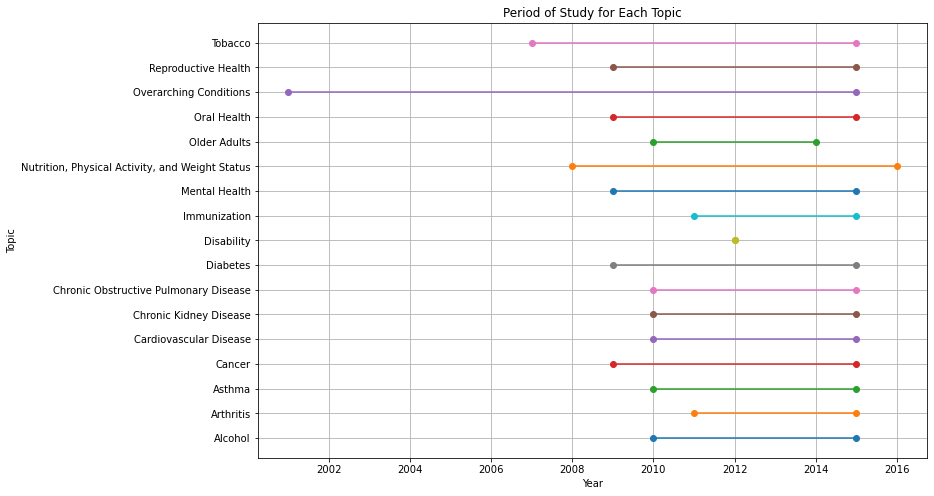

In [22]:
# Group data by Topic and calculate the minimum and maximum YearStart and YearEnd for each topic
topic_periods = data.groupby('Topic').agg({'YearStart': 'min', 'YearEnd': 'max'}).reset_index()

# Plot period of study for each topic
plt.figure(figsize=(12, 8))
for i, row in topic_periods.iterrows():
    plt.plot([row['YearStart'], row['YearEnd']], [i, i], marker='o', label=row['Topic'])

plt.yticks(range(len(topic_periods)), topic_periods['Topic'])
plt.xlabel('Year')
plt.ylabel('Topic')
plt.title('Period of Study for Each Topic')
plt.grid(True)
plt.show()


Overaching conditions had the longest study period  while reproductive health and disability ha the shortes period which might explain their low distribution among states

### Data Sources

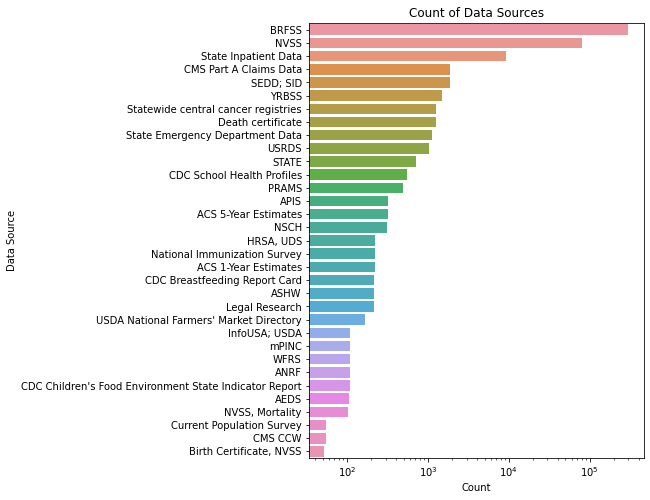

In [23]:
# Count occurrences of each data source
data_source_counts = data['DataSource'].value_counts()

# Plot count of data sources
plt.figure(figsize=(6, 8))
sns.barplot(x=data_source_counts.values, y=data_source_counts.index)
plt.xscale('log')  # Using logarithmic scale for x-axis
plt.title('Count of Data Sources')
plt.xlabel('Count')
plt.ylabel('Data Source')
plt.show()

BRFSS was the leading datasouce for the dataset followed by NVSS while Birth certificate,NVSS and InfoUSA came last

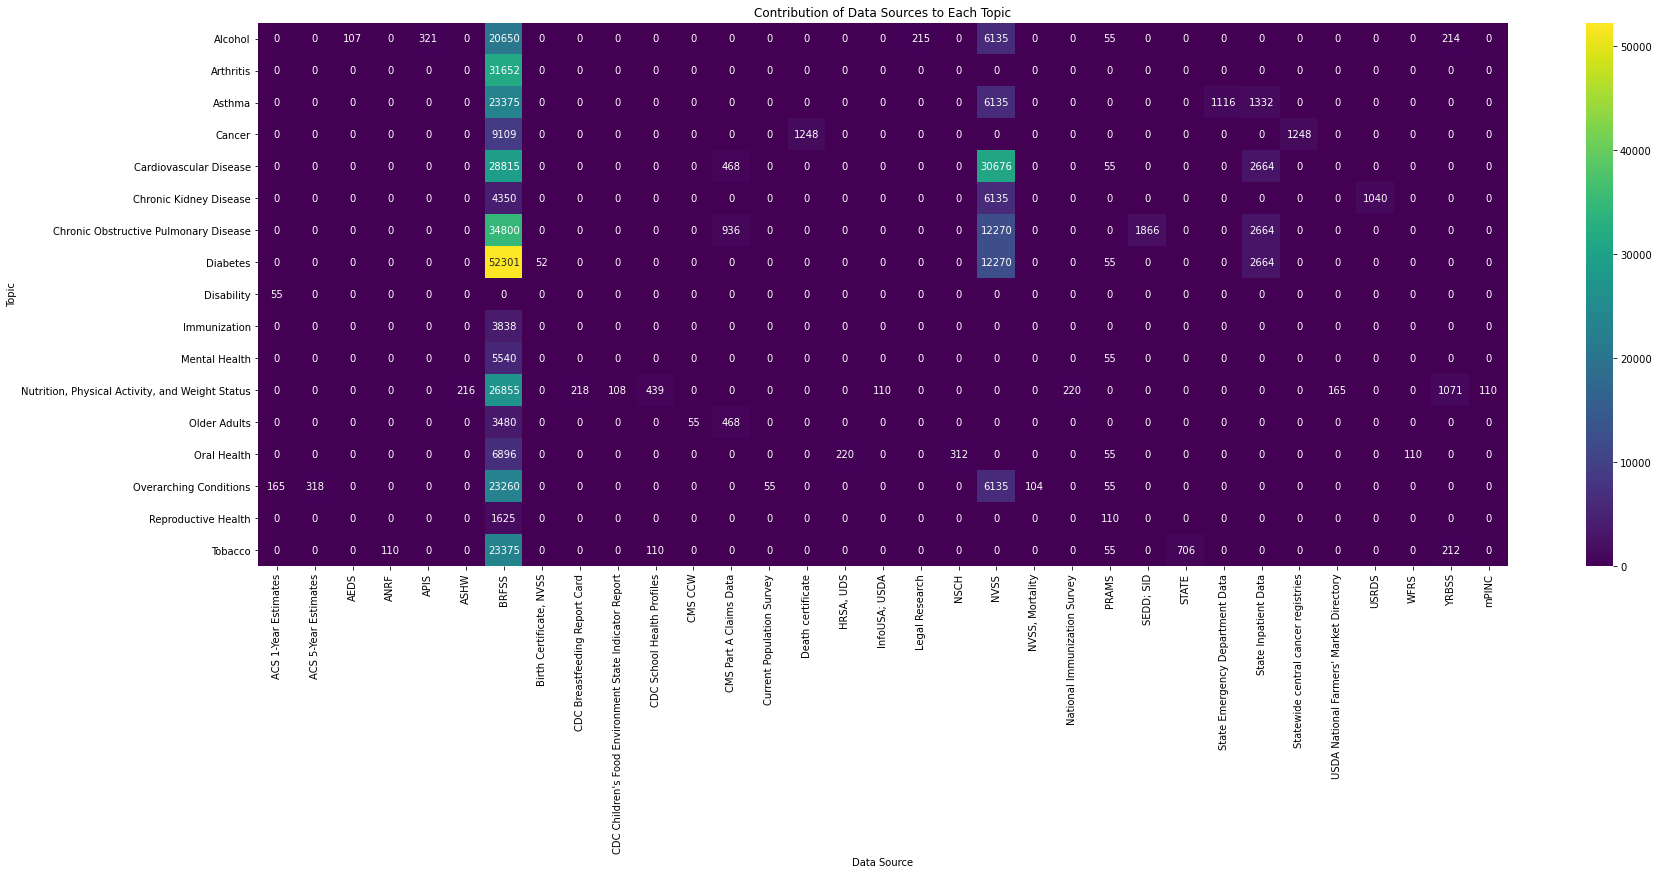

In [24]:
# Create a pivot table to count occurrences of each combination of Topic and DataSource
topic_data_source_counts = data.pivot_table(index='Topic', columns='DataSource', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(28, 10))
sns.heatmap(topic_data_source_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Contribution of Data Sources to Each Topic')
plt.xlabel('Data Source')
plt.ylabel('Topic')
plt.show()


The hatmap shows how each data source contributed to the topics:
1. From the heatmap we can see that the largest data contributor to cancer as a topic was Death certificates and the Statewide central cancer registry.
2. Diabetes got most of its data from BRFSS
3. BRFSS contributed t almost all topics except Disability which got its data from ACS 1-year Estimates.

### Questions

In [25]:
# Count occurrences of each question
question_counts = data['Question'].value_counts()

# Print the five most common questions
print("Five most common questions asked:")
question_counts.head()


Five most common questions asked:


Mortality from heart failure                                                                                              6136
Mortality from diseases of the heart                                                                                      6135
Mortality from coronary heart disease                                                                                     6135
Mortality due to diabetes reported as any listed cause of death                                                           6135
Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years    6135
Name: Question, dtype: int64

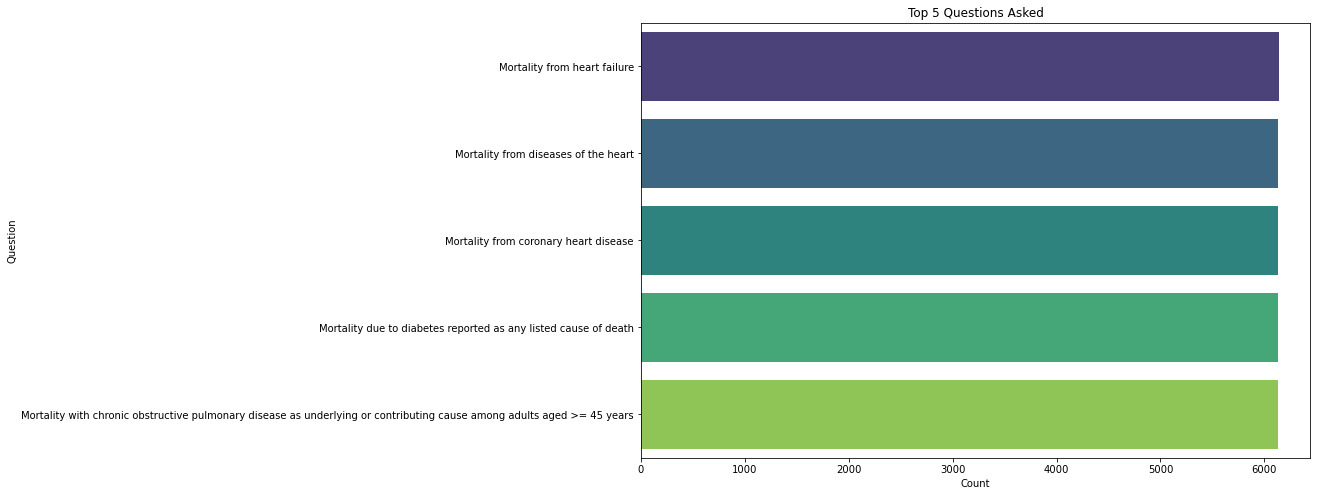

In [26]:
# Select the top 5 questions
top_questions = question_counts.head(5)

# Plot top 5 questions
plt.figure(figsize=(12, 8))
sns.barplot(x=top_questions.values, y=top_questions.index, palette='viridis')
plt.title('Top 5 Questions Asked')
plt.xlabel('Count')
plt.ylabel('Question')
plt.show()



### Stratification
stratification refers to the process of dividing a population into homogeneous subgroups or strata based on certain characteristics like age, gender, race, or any other categorical variable of interest.
This helps in analyzing data more effectively by considering the variation within each subgroup separately, which can reveal insights that might be masked when analyzing the entire population as a whole.

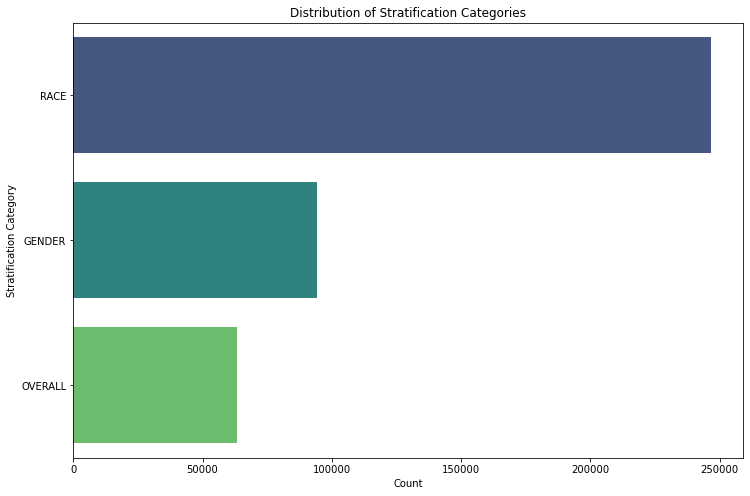

In [27]:
# Count occurrences of each stratification category
stratification_counts = data['StratificationCategoryID1'].value_counts()

# Plot stratification category distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=stratification_counts.values, y=stratification_counts.index, palette='viridis')
plt.title('Distribution of Stratification Categories')
plt.xlabel('Count')
plt.ylabel('Stratification Category')
plt.show()


The largest stratification category is race where individuals were put in groups respective of their races 

<ipython-input-28-9f2e1ffcf884>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 864x576 with 0 Axes>

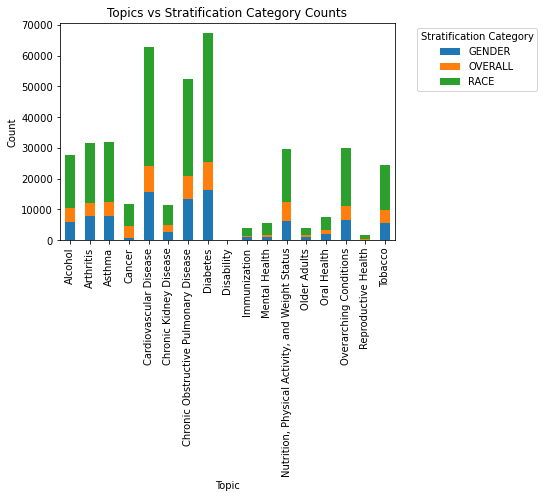

In [28]:

# Group data by Topic and StratificationCategoryID1 and count occurrences
topic_stratification_counts = data.groupby(['Topic', 'StratificationCategoryID1']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
topic_stratification_counts.plot(kind='bar', stacked=True)
plt.title('Topics vs Stratification Category Counts')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Stratification Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
# Check different stratification categories and their relation to 'StratificationID' column
stratification_counts = data.groupby(['StratificationCategoryID1', 'StratificationID1']).size()

# Print the result
print(stratification_counts)


StratificationCategoryID1  StratificationID1
GENDER                     GENF                 47075
                           GENM                 47075
OVERALL                    OVR                  63215
RACE                       AIAN                 11163
                           API                  11163
                           BLK                  49324
                           HIS                  49324
                           MRC                  38160
                           OTH                  38161
                           WHT                  49324
dtype: int64


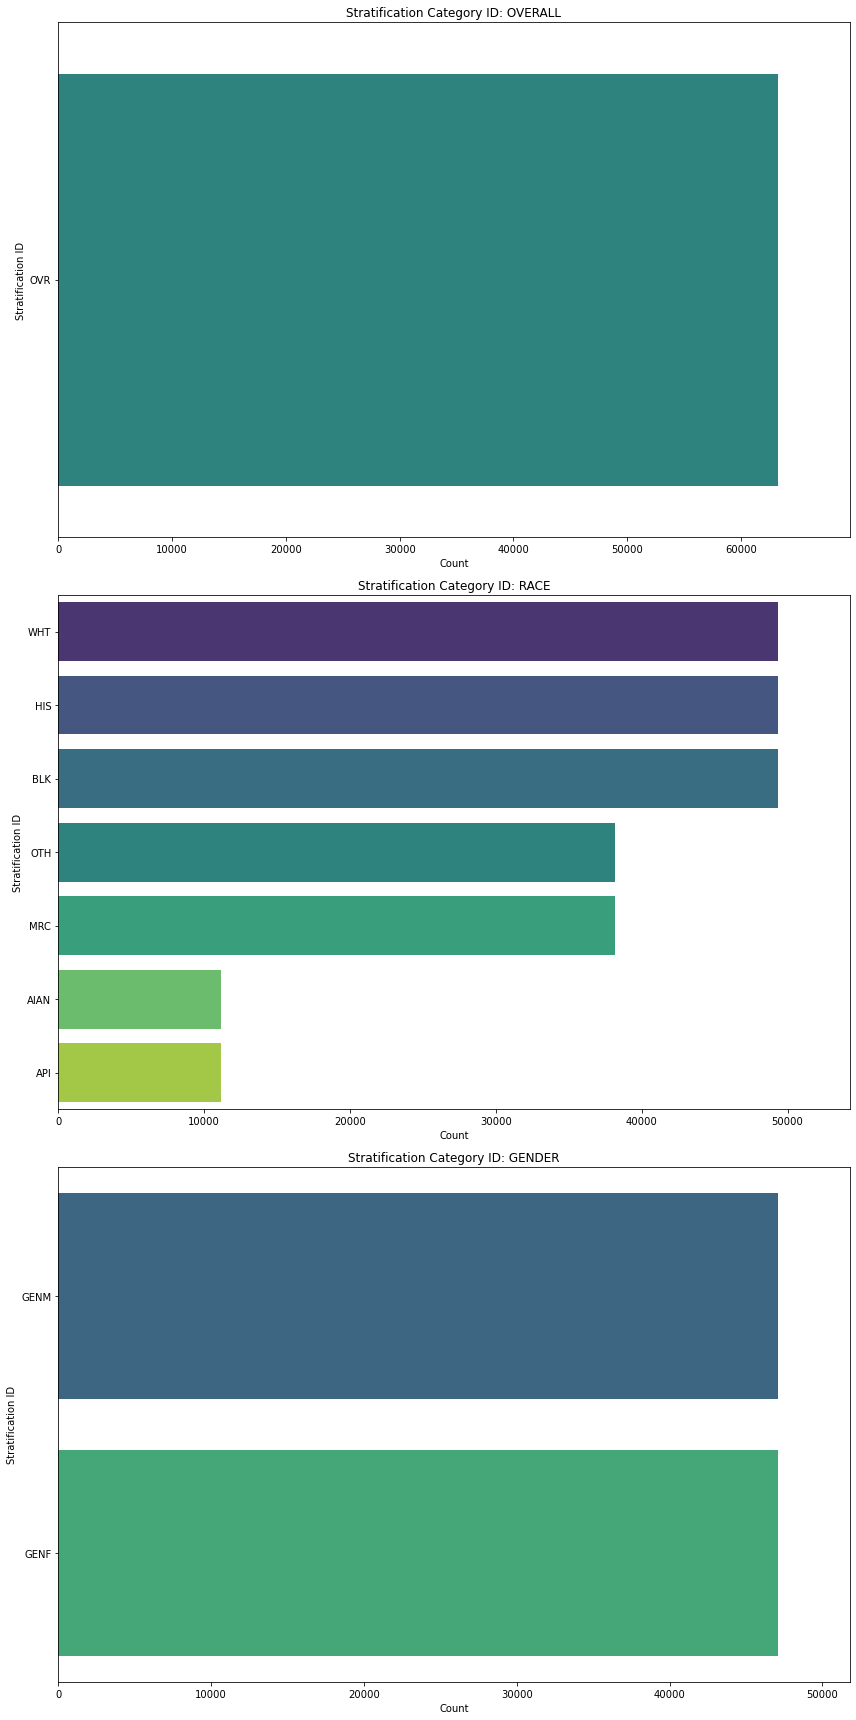

In [30]:
# Get unique stratification category IDs
stratification_category_ids = data['StratificationCategoryID1'].unique()

# Create subplots for each stratification category ID
fig, axes = plt.subplots(len(stratification_category_ids), 1, figsize=(12, 8 * len(stratification_category_ids)))

# Iterate over each stratification category ID
for i, strat_cat_id in enumerate(stratification_category_ids):
    # Filter data for the current stratification category ID
    strat_data = data[data['StratificationCategoryID1'] == strat_cat_id]
    
    # Group data by StratificationID1 and count occurrences
    stratification_counts = strat_data['StratificationID1'].value_counts()
    
    # Plot bar plot
    sns.barplot(x=stratification_counts.values, y=stratification_counts.index, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Stratification Category ID: {strat_cat_id}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Stratification ID')
    axes[i].set_xlim(0, max(stratification_counts.values) * 1.1)

# Adjust layout and show plots
plt.tight_layout()
plt.show()
